

# Analysis of crime data in Medellin, Colombia.


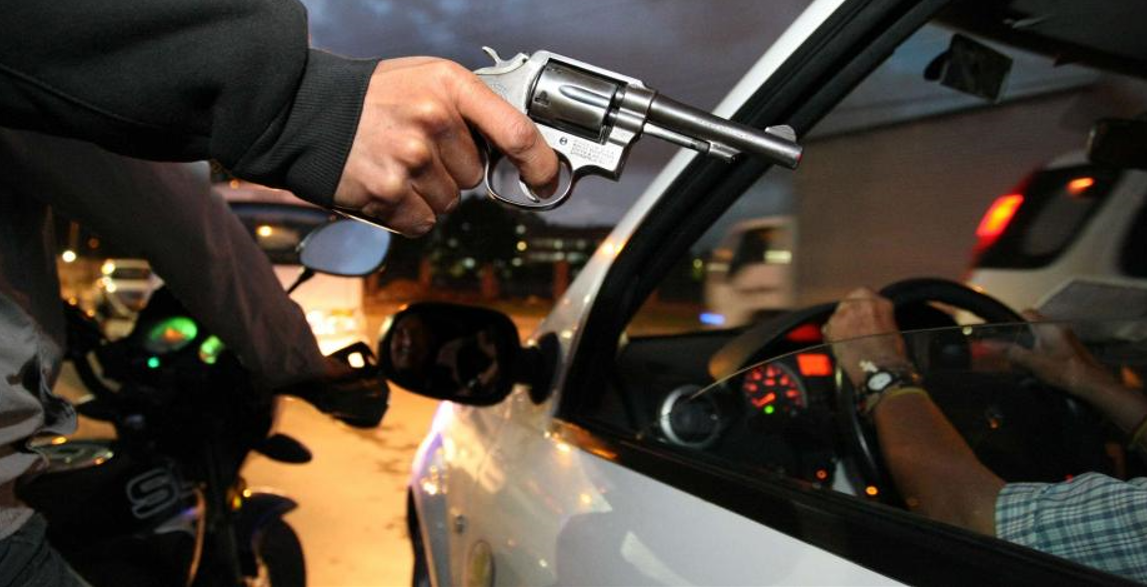

# Introduction

Citizen security has become one of the main concerns of governments given its direct relationship with people's quality of life, economic growth and regional development. 

Historically, the focus of the strategies of local authorities have been centered on reactive responses such as the capture of criminals, however, recently it has been recognized the need to develop preventive strategies of surveillance and control in public spaces, using Machine Learning technology. 

For this reason we wanted to carry out this project in order to collaborate with the strategies of the authorities and for the citizens of the city of Medellin.

**Business Context:**
The city of Medellin has seen an increase in the number of thefts in the city.
We would like to know through a machine learning model how likely a person is to be robbed in a particular neighborhood of the city. For the reported thefts, they have collected details of each accident and have been keeping records for the last two years (from January 2003 to September 2021).


**Business problem:**
Our main task is to explore the data and identify crime patterns in the city of Medellin and propose strategies to efficiently deploy its workforce to combat crime, as well as provide a tool for citizens.

**Analytical context:**
We have a national police dataset with information regarded to crimes committed throughout the city. In this case, the effort will focus on exploratory analysis to construct some preliminary strategies for police deployment. These strategies can be further consolidated or discarded using a more rigorous statistical analysis that will be performed late


# Loading up the data
We load the following data sets.

```
hurto_a_persona.csv
```
The dataset consists of the following features:

**fecha_hecho**: Date on which the event took place.

**latitud**: Geographical latitude coordinate using wgs84 system.

**longitud**: Geographical longitude coordinate using wgs84 system.

**sexo:** Victim's biological sex, or, when measured by the commission of a crime, the suspect's biological sex.

**edad**: Victim's age, or, when measured by the commission of a crime, the suspect's age.

**edad_categoria**:
the age column is grouped into categories, with the following labels
* -1 NaN
* 0  to 2 infante
* 2 to 12 niño
* 12 to 18 adolecente
* 18 to 60 Adulto
* 60 to 120 Adulto Mayor

**estado_civil**: Victim's marital status, or, when measured by the commission of a crime, the suspect's marital status.

**medio_transporte**: Means of transport used by the victim.

**conducta**: Is the inventory of indicators or facts associated with security and coexistence.

**modalidad**:Is the way in which the event materializes.

**conducta_especial**: An additional form of characterization.

**arma_medio**: Is the weapon, means or mechanism with which the act is committed.

**articulo_penal**: Articles of the penal code or of the police code of contraventions.

**nombre_barrio**: Name of the neighborhood where the events took place.

**codigo_barrio**: Code of the neighborhood where the events took place.

**codigo_comuna**: Code of the commune where the events took place.

**lugar**: Place where the events occurred. The place is a typification of the urbanism closest to the event.

**sede_receptora**: Police station that attended the case.

**bien**: Name of the property

**categoria_bien**: Grouping ofstolen property, intermediate level of aggregation.

**grupo_bien**:Grouping of stolen property, high level of aggregation.

**color**: Color of the stolen property.

**hora_hecho**: Event time.

We also use the dataset `consolidado_cantidad_casos_criminalidad_por_anio_mes.csv`, for comparison purposes since it is a consolidated dataset.

This dataset contains the columns:

**Fecha_hecho:** Month of the events (Datetime)

**Modalidad:** Type of model of the events.

**Cantidad_casos:** Sum of each modality type in the month.

Finally we have a dataset called `comunas_df` this dataset was conformed by 2 sources of information.

1 Dataset:Límite Catastral de Comunas y Corregimientos of geomedellin-m-medellin.

2 Dataset: Health Observatory of the Health Secretariat of medellin.


**Source of information:** 

[Secretaría de Seguridad y convivencia - Sistema de Información para la Seguridad y la Convivencia SISC-hurtos_df](http://medata.gov.co/dataset/hurto-persona)

[Secretaría de Seguridad y convivencia - Sistema de Información para la Seguridad y la Convivencia SISC-consolidado_df](http://medata.gov.co/dataset/consolidado-cantidad-de-casos-criminalidad-por-a%C3%B1o-y-mes)



# Libreries

In [1]:
#Import of libraries to be used in the project.
# import dash
# import dash_bootstrap_components as dbc
# import dash_core_components as dcc
# import dash_html_components as html
from datetime import datetime as dt
import folium
from folium import Map
from folium.plugins import HeatMap
# import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
# import pyproj
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as sfm
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading data:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import sklearn

In [4]:
sklearn.__version__


'1.0.2'

In [5]:
hurtos_df = pd.read_csv('drive/Shareddrives/DS4A Team 81/EDA/dataset/hurto_a_persona.csv')

In [6]:
consolidado_df = pd.read_csv('drive/Shareddrives/DS4A Team 81/EDA/dataset/consolidado_cantidad_casos_criminalidad_por_anio_mes.csv',encoding = 'utf-8')

In [7]:
comunas_df = pd.read_csv('drive/Shareddrives/DS4A Team 81/EDA/dataset/comunas.csv', sep=';')

# As usual, we take a look at the head of each data set:**

In [8]:
consolidado_df.head()

Fecha_hecho        Modalidad  Cantidad_casos   año
0  2003-01-01        Extorsión              23  2003
1  2003-01-01        Homicidio             222  2003
2  2003-01-01  Hurto a persona             214  2003
3  2003-01-01   Hurto de carro             560  2003
4  2003-01-01    Hurto de moto             364  2003

In [9]:
hurtos_df.head()

fecha_hecho   latitud   longitud    sexo  edad            estado_civil  \
0    1/1/2017  6.299703 -75.582016   Mujer    33  Unión marital de hecho   
1    1/1/2017  6.250917 -75.566160   Mujer    26              Soltero(a)   
2    1/1/2017  6.274836 -75.554909  Hombre    30              Soltero(a)   
3    1/1/2017  6.276236 -75.553533  Hombre    37               Casado(a)   
4    1/1/2017  6.250339 -75.586914  Hombre    87               Casado(a)   

  medio_transporte         conducta modalidad conducta_especial  ...  \
0         Caminata  Hurto a persona    Atraco        De celular  ...   
1         Caminata  Hurto a persona    Atraco          Sin dato  ...   
2         Caminata  Hurto a persona  Descuido        De celular  ...   
3             Taxi  Hurto a persona    Atraco        De celular  ...   
4         Caminata  Hurto a persona    Engaño          Sin dato  ...   

        bien                  categoria_bien grupo_bien     color hora_hecho  \
0    Celular                      Tecnología  Mercancía  Sin dato       1:00   
1    Celular                      Tecnología  Mercancía  Sin dato      15:00   
2    Celular                      Tecnología  Mercancía     Negro      14:00   
3    Celular                      Tecnología  Mercancía     Negro      16:00   
4  Billetera  Prendas de vestir y accesorios  Mercancía  Sin dato      16:00   

  edad_categoria   año nombre_del_dia_semana hora month  
0         adulto  2017                Sunday    1     1  
1         adulto  2017                Sunday   15     1  
2         adulto  2017                Sunday   14     1  
3         adulto  2017                Sunday   16     1  
4   adulto mayor  2017                Sunday   16     1  

[5 rows x 26 columns]

In [10]:
comunas_df.head()

comuna  sector          area    perimetro         nombre  poblacion
0      50       7  5.778379e+07  40997.34846       PALMITAS       7061
1      90       9  7.467522e+07  71755.20612    SANTA ELENA      19559
2      70       8  2.862201e+07  37766.63026      ALTAVISTA      38574
3      10       3  7.359454e+06  13769.39692  LA CANDELARIA      85658
4      60       7  5.467481e+07  52413.97892  SAN CRISTOBAL      93072

# Let's get to know some concepts of theft modalities.

**Theft:** acquiring, transporting, taking property that legally belongs to another person. This crime includes:
Rateria: the unlawful appropriation of items that are in the physical possession of another person, where the victim is usually not immediately aware of the theft.

**Purse Snatching:** the grabbing or snatching of a wallet, purse, etc. from the physical possession of another person. For this case if more force is used than is actually necessary to snatch the purse from the hand, or if the victim resists in any way, then a theft has occurred.

**2. Robbery:** taking or attempting to take any object of value, in circumstances of confrontation, which is in the control, custody or care of another person by force or threat or violence and/or placing the victim in fear of immediate harm.


On the other hand, the Colombian Penal Code covers both concepts within articles 239 and 240, defining Articles 239 and 240, defining theft as the possession of a movable thing belonging to another, with the purpose of obtaining profit for oneself or for another, and states that, if it is carried out with violence or placing the victim in a defenseless or inferior condition, it should be established as Qualified Theft. In addition, the National Administrative Department of Statistics (DANE) includes the following definitions of theft from persons in the survey on Citizen Coexistence and Security [36]:


**Tickling (Cosquilleo):** This is a method in which criminals take advantage of crowds in shopping malls, mass transportation or other public places to take money, cell phones or other items without the victim noticing what has happened. The objects are taken from backpacks, suitcases, purses, jackets, pockets, etc., without the other person being aware of it.


**Fraud:** Theft in which lies, falsehood and impersonation are used to make victims voluntarily agree to hand over their valuables.
Raponazo: is theft by rapid action, whereby the victim's belongings are taken before he/she can react.


**Robbery (Atraco):** is robbery with intimidation using bladed weapons, firearms or blunt weapons to force the victim to hand over his or her belongings.
Fleteo: a type of robbery carried out against people who leave financial institutions and have just made cash withdrawals. Upon leaving the bank, they are followed by several individuals who approach them, threaten them and take their money.


**Millionaire Stroll:** a form of robbery in which the victim boards a vehicle where they are held by criminals who then force them to accompany them to various ATMs and hand over money. For example, a cab driver picks up a person on the street, later other criminals enter the cab, threaten him and take him to an ATM to steal his money.

**Carelessness:** the offender takes advantage of the victim's lack of attention in taking care of his belongings to snatch them without the victim noticing.


# Data Cleaning

In [11]:
# """In the consolidado_df dataset we improve the consistency of the data by changing the data type in the fecha_hecho to datetime type."""

consolidado_df['Fecha_hecho'] = pd.to_datetime(consolidado_df['Fecha_hecho'])
consolidado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha_hecho     1422 non-null   datetime64[ns]
 1   Modalidad       1422 non-null   object        
 2   Cantidad_casos  1422 non-null   int64         
 3   año             1422 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 44.6+ KB


In [12]:
# """

# In the dataset hurtos_df to improve data consistency the data type fecha_hecho is changed to type datetime and edad_categoria to type category.

# """
hurtos_df['fecha_hecho'] = pd.to_datetime(hurtos_df['fecha_hecho'])


In [13]:
# """ 
# In the initial cleanup, age_category was created, placing labels on it, and in this notebook it was changed to categorical.
# """

hurtos_df['edad_categoria']= hurtos_df['edad_categoria'].astype('category')

In [14]:
hurtos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248532 entries, 0 to 248531
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_hecho            248532 non-null  datetime64[ns]
 1   latitud                234639 non-null  float64       
 2   longitud               234639 non-null  float64       
 3   sexo                   246871 non-null  object        
 4   edad                   248532 non-null  int64         
 5   estado_civil           248532 non-null  object        
 6   medio_transporte       248532 non-null  object        
 7   conducta               248532 non-null  object        
 8   modalidad              248532 non-null  object        
 9   conducta_especial      248532 non-null  object        
 10  arma_medio             248532 non-null  object        
 11  nombre_barrio          248532 non-null  object        
 12  codigo_barrio          248532 non-null  obje

In [15]:
# """
# We eliminate the modalities that are not considered theft in the Colombian penal code.

# """

hurtos_df['modalidad'].unique()

array(['Atraco', 'Descuido', 'Engaño', 'Rompimiento de ventana',
       'Sin dato', 'Raponazo', 'Cosquilleo', 'Rompimiento cerraduta',
       'Halado', 'Llave maestra', 'Tóxico o agente químico',
       'Suplantación', 'Paquete chileno', 'Violencia intrafamiliar',
       'Abuso de confianza', 'Enfrentamiento con la fuerza pública',
       'Comisión de delito', 'Escopolamina', 'Clonación de tarjeta',
       'Simulando necesidad', 'Miedo o terror', 'Vandalismo', 'Forcejeo',
       'Retención de tarjeta', 'Informático', 'Retención de dinero',
       'Auto robo', 'Llamada millonaria', 'Fleteo', 'Sumersión'],
      dtype=object)

As we can see we have different modalities to the 'Theft' according to what the penal code says, it should be noted that the information is obtained from the page of complaints of the national police by enden is very normal to get different modalities to the theft.

We will eliminate the following modalities:

In [16]:
hurtos_df = hurtos_df.drop(hurtos_df[hurtos_df['modalidad'] == 'Violencia intrafamiliar'].index)
hurtos_df = hurtos_df.drop(hurtos_df[hurtos_df['modalidad'] == 'Enfrentamiento con la fuerza pública'].index)
hurtos_df = hurtos_df.drop(hurtos_df[hurtos_df['modalidad'] == 'Tóxico o agente químico'].index)
hurtos_df = hurtos_df.drop(hurtos_df[hurtos_df['modalidad'] == 'Vandalismo'].index)
hurtos_df = hurtos_df.drop(hurtos_df[hurtos_df['modalidad'] ==  'Comisión de delito'].index)
hurtos_df = hurtos_df.drop(hurtos_df[hurtos_df['modalidad'] == 'Halado'].index)
hurtos_df = hurtos_df.drop(hurtos_df[hurtos_df['modalidad'] == 'Sumersión'].index)

We verify that the elimination is correct:

In [17]:

hurtos_df['modalidad'].unique()

array(['Atraco', 'Descuido', 'Engaño', 'Rompimiento de ventana',
       'Sin dato', 'Raponazo', 'Cosquilleo', 'Rompimiento cerraduta',
       'Llave maestra', 'Suplantación', 'Paquete chileno',
       'Abuso de confianza', 'Escopolamina', 'Clonación de tarjeta',
       'Simulando necesidad', 'Miedo o terror', 'Forcejeo',
       'Retención de tarjeta', 'Informático', 'Retención de dinero',
       'Auto robo', 'Llamada millonaria', 'Fleteo'], dtype=object)

***

We had some coordinates that did not belong to medellin or its townships, these were manually deleted in csv,
only coordinates pertaining to the city of medellin are left

***

In [18]:
hurtos_df['latitud']

0         6.299703
1         6.250917
2         6.274836
3         6.276236
4         6.250339
            ...   
248527    6.239203
248528    6.275737
248529    6.253145
248530    6.210456
248531    6.278422
Name: latitud, Length: 245216, dtype: float64

In [19]:

hurtos_df['longitud']

0        -75.582016
1        -75.566160
2        -75.554909
3        -75.553533
4        -75.586914
            ...    
248527   -75.596686
248528   -75.581470
248529   -75.566181
248530   -75.569637
248531   -75.571080
Name: longitud, Length: 245216, dtype: float64

# Exploration & Analysis.

Before making any model in our project, we must explore our data, one of the first questions that occurred to us was to know which modality excels in the department of Medellin, we will plot using Matploplib:

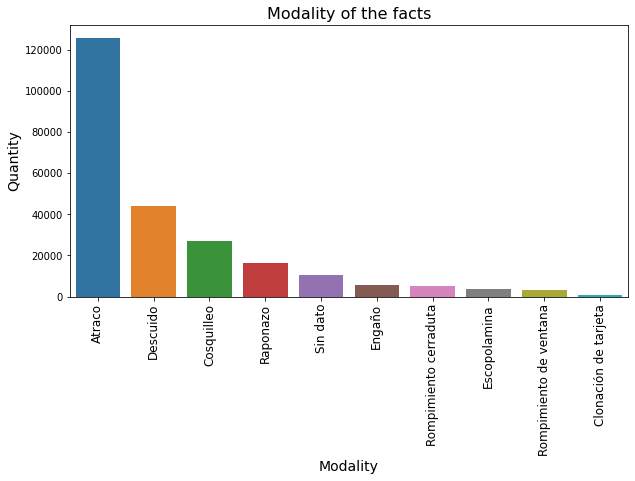

In [20]:

plt.figure(figsize=(10,5))

plt.xticks(rotation=90, fontsize=12)
sns.countplot(x='modalidad',data=hurtos_df, order=hurtos_df["modalidad"].value_counts().iloc[:10].index)
plt.title('Modality of the facts', fontsize=16)
plt.xlabel('Modality', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.show()


Let's use a word cloud to see which modalities stand out from this one.

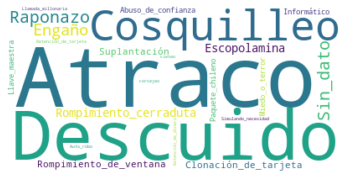

In [ ]:
hurtos_modalidad = hurtos_df.groupby(["modalidad"])["modalidad"].count().reset_index(name="count").sort_values(by="count", ascending = False).reset_index(drop=True)

hurtos_modalidad["modalidad"]=hurtos_modalidad['modalidad'].str.replace(r' ','_')
text = ' '.join(hurtos_modalidad['modalidad'])
wordcloud = WordCloud(max_font_size=100, max_words=200, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Observation**: In this first observation, we can see that the top 3 theft modalities in the city of Medellin are mugging, carelessness and tingling (cosquilleo).

**We want to know the annual behavior of incidents in the city of Medellin.**

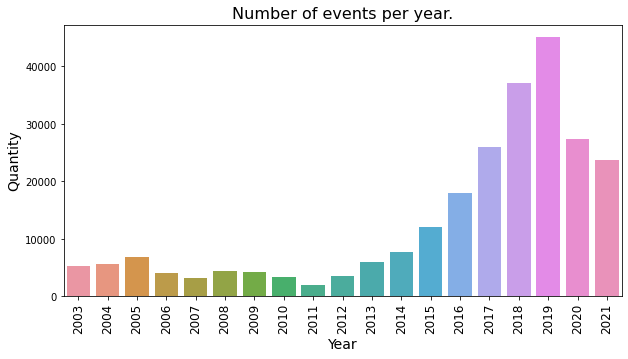

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, fontsize=12)
sns.countplot(x='año',data=hurtos_df)
plt.title('Number of events per year.', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.show()

In [ ]:
#extract year date_fact from consolidado_df
consolidado_df['año'] = consolidado_df['Fecha_hecho'].dt.year

percentage_year = consolidado_df.groupby('año').sum()
percentage_year['porcentaje'] = percentage_year['Cantidad_casos']/percentage_year['Cantidad_casos'].sum()*100
#rounding to 2 decimal places and placing % in the percentage column
percentage_year['porcentaje'] = percentage_year['porcentaje'].round(2)
percentage_year['porcentaje'] = percentage_year['porcentaje'].astype(str) + '%'
percentage_year

Cantidad_casos porcentaje
año                            
2003           21203      5.03%
2004           16650      3.95%
2005           14411      3.42%
2006           11307      2.68%
2007            8851       2.1%
2008           11300      2.68%
2009           13202      3.13%
2010            9818      2.33%
2011           10937       2.6%
2012           12635       3.0%
2013           15060      3.58%
2014           15919      3.78%
2015           20576      4.89%
2016           27125      6.44%
2017           36291      8.62%
2018           49459     11.74%
2019           57241     13.59%
2020           37816      8.98%
2021           31389      7.45%

**Observation**:The incident information was from January 1, 2003, to September 21, 2021. Likewise, the years with the highest percentage of records correspond to 2019 (13.59 %), 2018 (11.74 %) and 2020 (8.98 %) covering 34.31 % of the entire sample.

# Occurrence of thefts by time and day of the week.

We will create 2 new columns day of the week and time, to create a crosstab:

In [ ]:
hurtos_df['nombre_del_dia_semana'] = hurtos_df['fecha_hecho'].dt.day_name()
hurtos_df['nombre_del_dia_semana']

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
            ...   
248527    Thursday
248528    Thursday
248529    Thursday
248530    Thursday
248531    Thursday
Name: nombre_del_dia_semana, Length: 245216, dtype: object

In [ ]:
hurtos_df['hora'] = hurtos_df['hora_hecho'].apply(lambda x: dt.strptime(x, '%H:%M').time().hour)
hurtos_df['hora']

0          1
1         15
2         14
3         16
4         16
          ..
248527    11
248528     5
248529    17
248530    16
248531    16
Name: hora, Length: 245216, dtype: int64

In [ ]:
data_days = pd.crosstab(index=hurtos_df["nombre_del_dia_semana"], columns=hurtos_df["hora"], normalize = "index")*100


In [ ]:
fig = px.imshow(data_days,
                labels=dict(x="Dia de la semana", y="Hora del dia", color="Events"),
                 color_continuous_scale='reds',
                text_auto=True
               )
fig.update_xaxes(side="top")
fig.update_layout(title_text="Events per day of the week and hour of the day")
fig.show()

**Observation:**
It can be observed that for all days, with the exception of Sunday, crimes occur mainly between 10 am and 8 pm, while on Sundays they occur in the early hours of the morning.

# Occurrence of thefts by age and sex.

Let's take a look at age category:

In [ ]:
hurtos_df['edad_categoria'].value_counts()

adulto          223618
adulto mayor     10075
adolescente       8508
niño               139
infante             25
Name: edad_categoria, dtype: int64

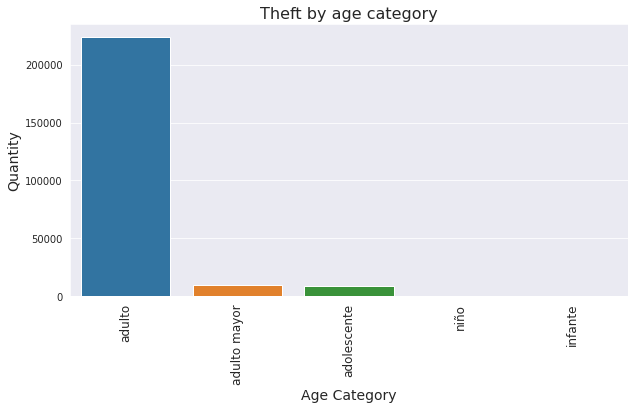

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, fontsize=12)

sns.countplot(x='edad_categoria', 
              data=hurtos_df, 
              order=hurtos_df['edad_categoria'].value_counts().index)

plt.title('Theft by age category', fontsize=16)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.show()

**Observations:**

We can see that the category of adults has the highest incidence, followed by older adults, and we can also see that the categories of children and infants have observations, but they are very minimal, since there have been thefts against them, but very few.

# **Now we will look at sex, and this time we will use a histogram:**


**Which gender is most affected by crime?**

In [ ]:
df_sexo = hurtos_df[~hurtos_df['sexo'].isnull()]

In [ ]:
fig_sexo = px.histogram(df_sexo, x="edad", color = 'sexo')
fig_sexo.update_layout(title_text=" Theft by sex and age")
fig_sexo.show()

**Observations:**
It can be observed that the behavior of thefts according to age for males and females have a similar distribution, however males present a higher amount of thefts compared to females.

**We want to know in which means of transportation women are robbed the most and in which means of transportation men are robbed the most**:

In [ ]:
def get_ct(hurtos_df,var):
    ct_res = pd.crosstab(hurtos_df[var],hurtos_df['sexo'], margins=True)
    ct_res['Sex_male(%)'] = round(ct_res['Hombre']/ct_res['All']*100,2)
    ct_res['Sex_Female(%)'] = round(ct_res['Mujer']/ct_res['All']*100,2)
    return ct_res.drop(columns='All')

In [ ]:
get_ct(hurtos_df, 'medio_transporte')

sexo                        Hombre   Mujer  Sex_male(%)  Sex_Female(%)
medio_transporte                                                      
Autobus                       2736    5362        33.79          66.21
Automóvil                    17302    8685        66.58          33.42
Bicicleta                     1829     438        80.68          19.32
Caminata                     95411   74129        56.28          43.72
Metro                         2894    1970        59.50          40.50
Motocicleta                   7006    3047        69.69          30.31
Motocicleta con parrillero     380     572        39.92          60.08
Sin dato                      9705    4764        67.07          32.93
Taxi                          4588    2806        62.05          37.95
All                         141851  101773        58.23          41.77

Let's check that the entire 'All' column is OK:

In [ ]:
hurtos_df['sexo'].value_counts()

Hombre    141851
Mujer     101773
Name: sexo, dtype: int64

**Observation:**

In this crosstab we can see several things: 

1- We can find information on the means of transport in which the victim was, mainly we can notice a big difference with respect to the incidents recorded when the person was not in a means of transport, i.e.
when the person was walking (69.72%) with respect to people who were traveling in a means of transport. 

It can be noted that there is a greater incidence of private transportation, such as automobiles (10.78%) and motorcycles (4.15%) followed by public transportation, such as buses (3.28%) and cabs (3.03%). Finally, there is a percentage with no information corresponding to 6.31%.

2- The means of transportation where women are robbed the most are:

1- Bus (66.18%)

2- motorcycle with the woman as a passenger (60.39%)

Here it is necessary to emphasize that thanks to the investigation we realize that there is a means of transport called 'Planeador' this means of transport does not exist in the city of Medellin and has very few records therefore it will be eliminated.

In [ ]:
hurtos_df = hurtos_df.drop(hurtos_df[hurtos_df['medio_transporte'] == 'Planeador'].index)

Men are the most affected, and it makes sense that there are more men in the city than women.

The mode of transportation where they lead is:

1- Bicycle (80.90%) Very used means in medellin because of the traffic.

2-Motorcycle (69.76%) Very used means of transport in Medellin because of the traffic.

3- Car (66.55%) 


# Occurrence by means of transportation.

What is the means of transportation in which most robberies occur?

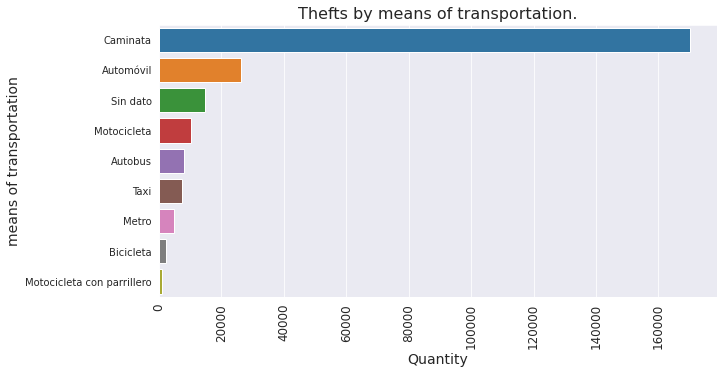

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, fontsize=12)

sns.countplot(y='medio_transporte', 
              data=hurtos_df, 
              order=hurtos_df['medio_transporte'].value_counts().index)

plt.title('Thefts by means of transportation.', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('means of transportation', fontsize=14)
plt.show()

**Observations:**
It is possible to notice a great difference with respect to the incidents registered when the person was not in a means of transportation, that is to say when the person was walking, with respect to the people who were traveling in some means of transportation. It can be noted that there is a greater incidence of incidents involving private transport, such as cars.

# Occurrence of thefts by mode and places.

**The 4 main types of thefts will be taken to identify the main sites of occurrence.**

In [ ]:
hurtos_df_2 = hurtos_df[hurtos_df['modalidad'] == "Atraco"]

In [ ]:
hurtos_df_2['lugar'].value_counts()[:10]

Vía pública                84915
Residencia                  4672
Vehículo particular         3184
Almacén tienda y otro       3113
Parque                      2998
Bus de servicio público     2789
Estación del Metro          2244
Edificio                    1959
Sin dato                    1400
Hotel                       1393
Name: lugar, dtype: int64

**Number of events per places in the modality robbery**

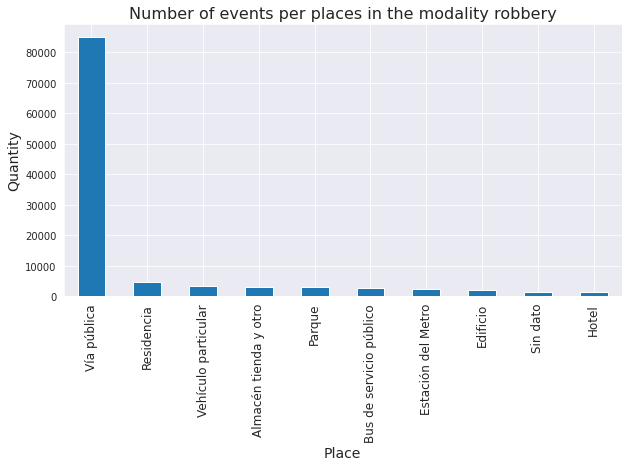

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, fontsize=12)
hurtos_df_2['lugar'].value_counts()[:10].plot.bar()
#sns.countplot(x='lugar',data=hurtos_df_2)
plt.title('Number of events per places in the modality robbery', fontsize=16)
plt.xlabel('Place', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.show()

**Modality: Neglect.**

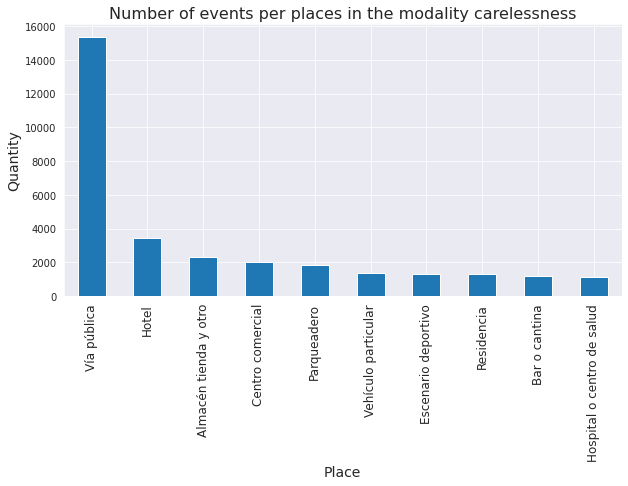

In [ ]:
hurtos_df_3 = hurtos_df[hurtos_df['modalidad'] == "Descuido"]
plt.figure(figsize=(10,5))
plt.xticks(rotation=45, fontsize=12)
hurtos_df_3['lugar'].value_counts()[:10].plot.bar()
#sns.countplot(x='lugar',data=hurtos_df_2)
plt.title('Number of events per places in the modality carelessness', fontsize=16)
plt.xlabel('Place', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.show()

**Modality: Tickling (Cosquilleo).**

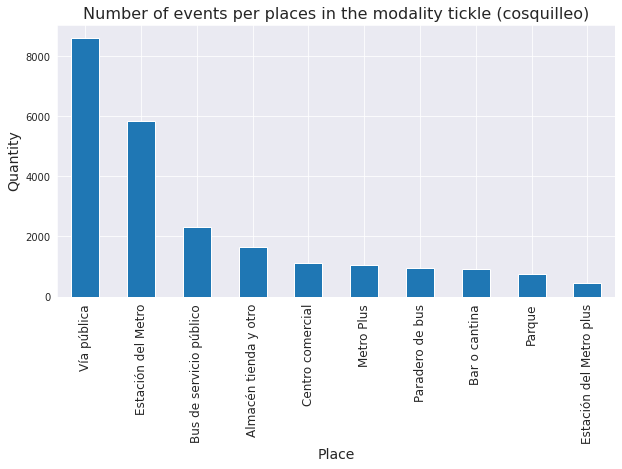

In [ ]:
hurtos_df_3 = hurtos_df[hurtos_df['modalidad'] == "Cosquilleo"]
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, fontsize=12)
hurtos_df_3['lugar'].value_counts()[:10].plot.bar()
#sns.countplot(x='lugar',data=hurtos_df_2)
plt.title('Number of events per places in the modality tickle (cosquilleo)', fontsize=16)
plt.xlabel('Place', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.show()

**Modality: Deception**

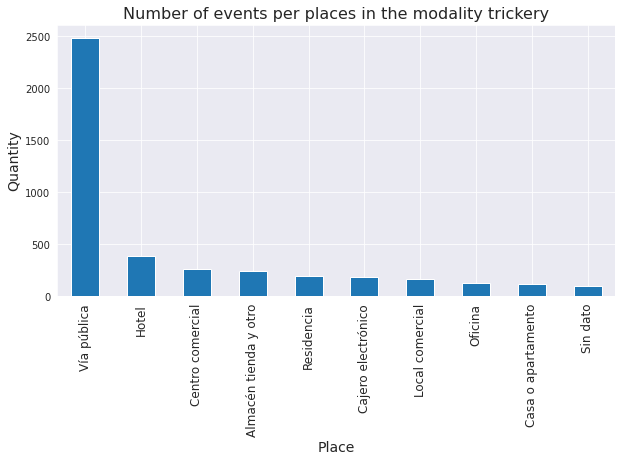

In [ ]:
hurtos_df_3 = hurtos_df[hurtos_df['modalidad'] == "Engaño"]
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, fontsize=12)
hurtos_df_3['lugar'].value_counts()[:10].plot.bar()
#sns.countplot(x='lugar',data=hurtos_df_2)
plt.title('Number of events per places in the modality trickery', fontsize=16)
plt.xlabel('Place', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.show()

**Observation:**

Public roads are the main place where crimes of various theft modalities are committed, followed by hotels and shopping centers.

However, the tickling category occurs mainly in public transportation.




# Occurrence of thefts in Medellin.

*** What is the distribution of the number of thefts presented by each locality?**


In [ ]:
hurtos_comuna = pd.DataFrame()
hurtos_df['codigo_comuna'] = hurtos_df['codigo_comuna'].replace('SIN DATO',99) 
hurtos_comuna['codigo_comuna'] = hurtos_df['codigo_comuna'].astype('int64')
hurtos_comuna['hurtos'] = hurtos_df['codigo_comuna'].astype('int64')
hurtos_comuna = hurtos_comuna.groupby('codigo_comuna').count()
hurtos_comuna = hurtos_comuna.reset_index()
hurtos_comuna = hurtos_comuna.sort_values(by='codigo_comuna')
hurtos_comuna = hurtos_comuna.reset_index(drop=True)
comunas_df = comunas_df.sort_values(by='comuna')
comunas_df = comunas_df.reset_index(drop=True)

In [ ]:
hurtos_comuna['nombre_comuna'] = comunas_df['nombre']
hurtos_comuna['nombre_comuna'] = hurtos_comuna['nombre_comuna'].replace(np.nan,'SIN DATO')
hurtos_comuna = hurtos_comuna.sort_values(by='hurtos',ascending=False)

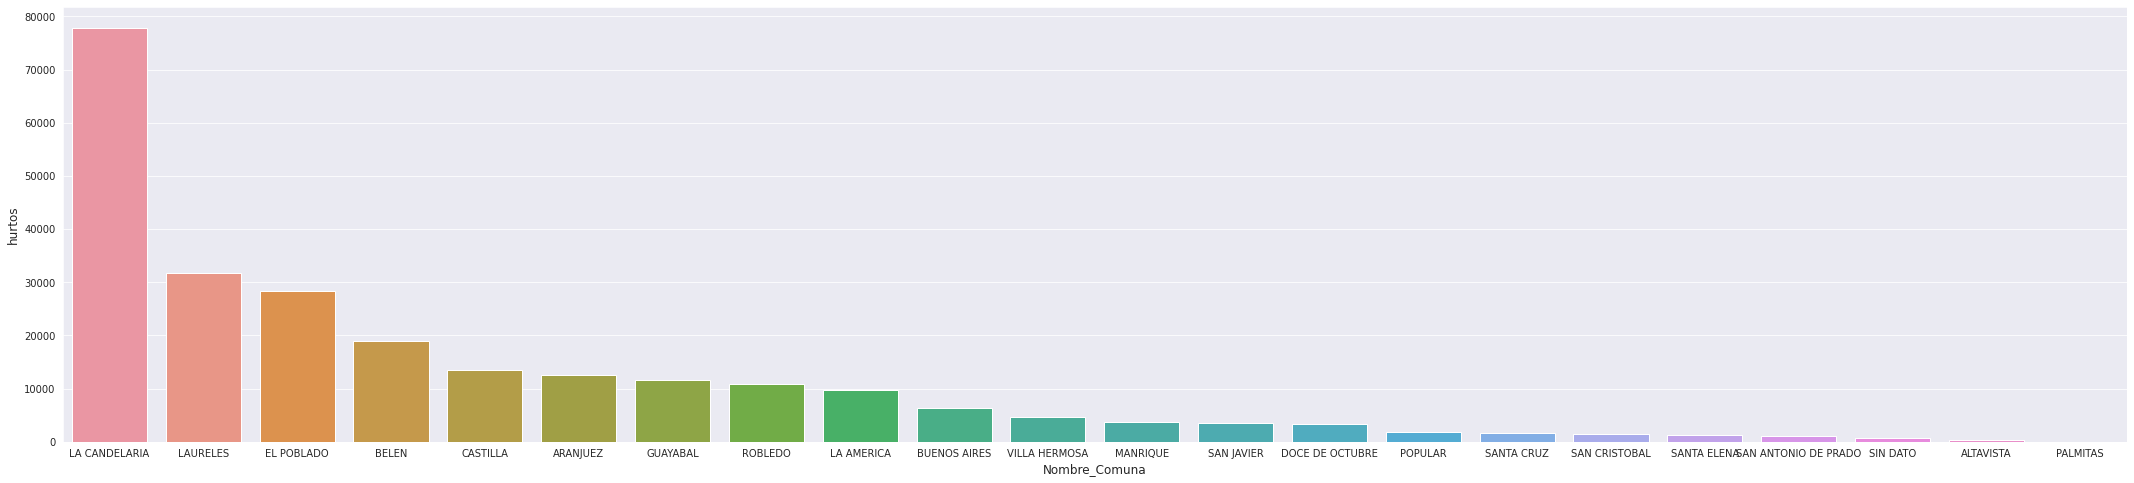

In [ ]:
plt.figure(figsize=(37,8))
sns.barplot(data=hurtos_comuna, x='nombre_comuna', y='hurtos')
plt.xlabel('Nombre_Comuna', fontsize=12)
plt.ylabel('hurtos', fontsize=12);

**Observation:**
It is evident that over the years, the locality where the highest number of robberies is concentrated is La Candelaria, followed by Laureles, as we will see later on in a map.


---



---

For the analysis, we made use of the data present in [link 1](https://geomedellin-m-medellin.opendata.arcgis.com/datasets/283d1d14584641c9971edbd2f695e502_6/explore?location=6.268478%2C-75.596100%2C12.00&showTable=true) and [link 2](https://www.medellin.gov.co/irj/go/km/docs/pccdesign/medellin/Temas/Salud_0/IndicadoresEstadisticas/Shared%20Content/Observatorio/Archivos%20PDF/PoblacionComunas.pdf) to build a dataset with the population and surface area of each commune.

*** What is the distribution of robberies per thousand inhabitants in Medellín's municipalities?**

In [ ]:
hurtos_comuna ['hurtos_por_mil_habitantes'] = hurtos_comuna['hurtos']/(comunas_df['poblacion']/1000)
hurtos_comuna = hurtos_comuna.sort_values(by='hurtos_por_mil_habitantes',ascending=False)

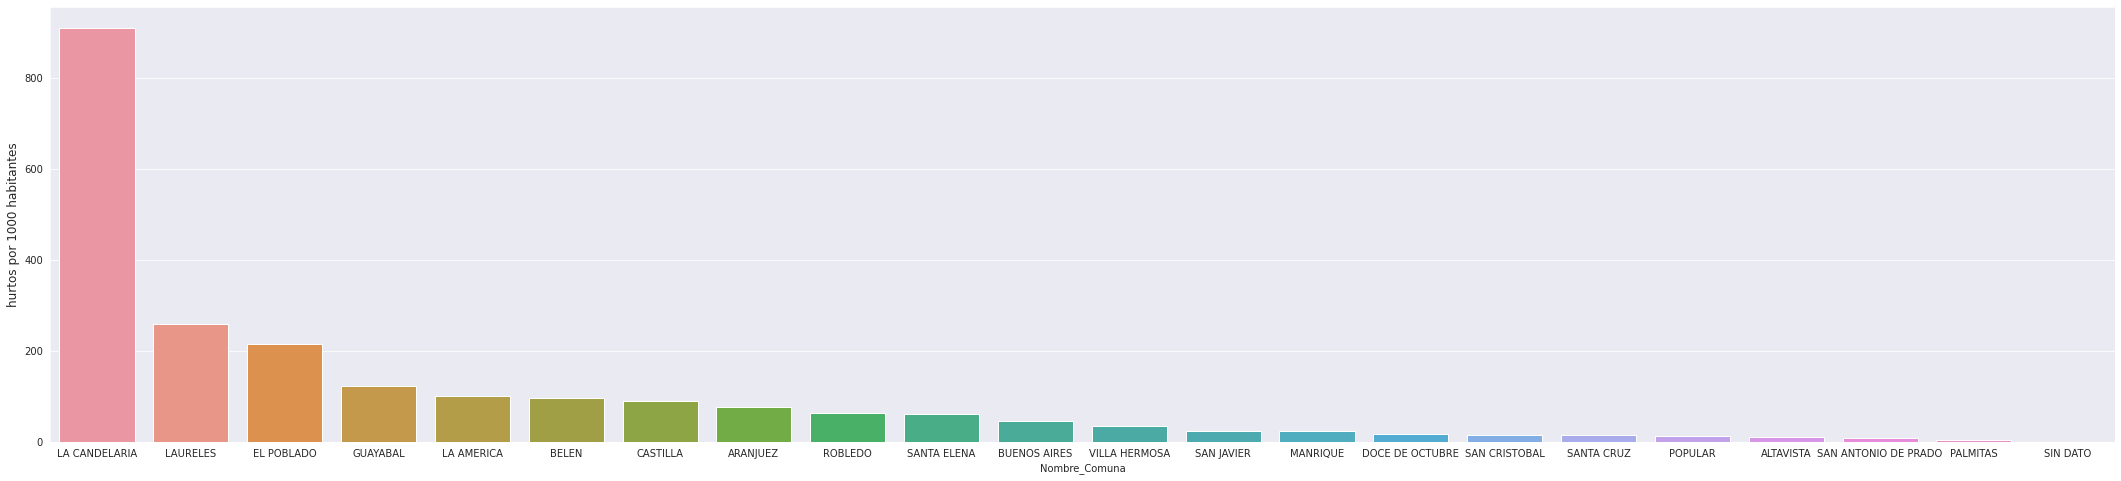

In [ ]:
plt.figure(figsize=(37,8))
sns.barplot(data=hurtos_comuna, x='nombre_comuna', y='hurtos_por_mil_habitantes')
plt.xlabel('Nombre_Comuna', fontsize=10)
plt.ylabel('hurtos por 1000 habitantes', fontsize=12);

**Observation:** It is evident that La Candelaria is the commune with the highest number of robberies per thousand inhabitants over time.

**What is the distribution of robberies per km2 in each commune of Medellín?**

In [ ]:
hurtos_comuna ['hurtos_por_km2'] = hurtos_comuna['hurtos']/(comunas_df['area']/1000)
hurtos_comuna = hurtos_comuna.sort_values(by='hurtos_por_km2',ascending=False)

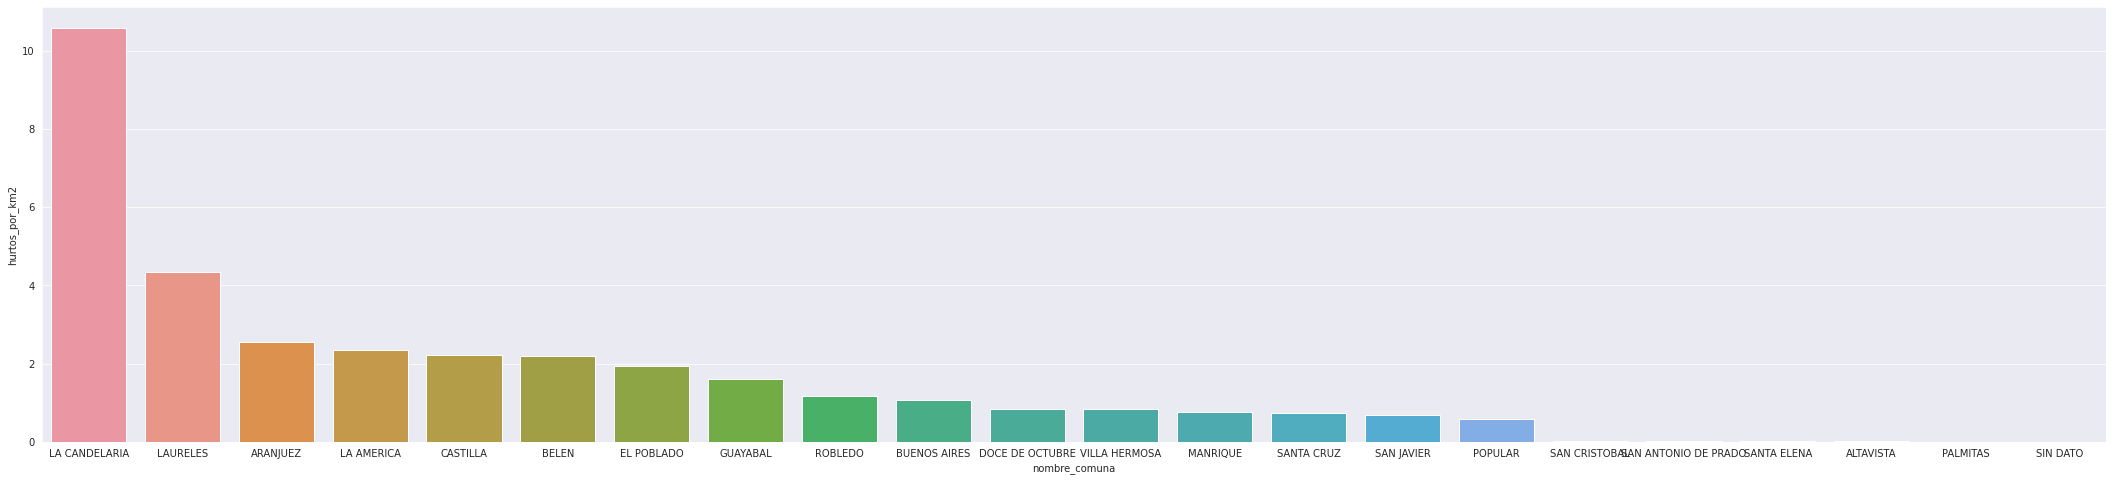

In [ ]:
plt.figure(figsize=(37,8))
sns.barplot(data=hurtos_comuna, x='nombre_comuna', y='hurtos_por_km2');

**Observation:** It is evident that crime related to theft from persons is concentrated mainly in the municipalities of La Candelaria and Laureles. This can be concluded since the statistics vary in the other municipalities depending on the analysis, while La Candelaria and Laureles always remain as the localities with the highest concentration.

# Let's now look at some bivariate distributions. This is a pair plot of some of the numeric variables of the dataset:

In [ ]:
hurtos_df['latitud'] = hurtos_df['latitud'].replace('SIN DATO',np.nan) 
hurtos_df['longitud'] = hurtos_df['longitud'].replace('SIN DATO',np.nan)
hurtos_df['latitud'] = hurtos_df['latitud'].replace('Sin dato',np.nan) 
hurtos_df['longitud'] = hurtos_df['longitud'].replace('Sin dato',np.nan)
hurtos_df['latitud'] = hurtos_df['latitud'].astype(float)
hurtos_df['longitud'] = hurtos_df['longitud'].astype(float)
hurtos_df['nombre_del_dia_semana'] = hurtos_df['fecha_hecho'].dt.day_name()
# hurtos_df['hour'] = hurtos_df['hora_hecho'].apply(lambda x: dt.strptime(x, '%H:%M').time().hour)
hurtos_df['año'] = hurtos_df['fecha_hecho'].dt.year
hurtos_df['month'] = hurtos_df['fecha_hecho'].dt.month
hurtos_df['nombre_del_dia_semana'] = hurtos_df['nombre_del_dia_semana'].replace('Sin dato',np.nan) 
# hurtos_df['hour'] = hurtos_df['hour'].replace('Sin dato',np.nan) 
hurtos_df['año'] = hurtos_df['año'].replace('Sin dato',np.nan) 
hurtos_df['month'] = hurtos_df['month'].replace('Sin dato',np.nan) 
hurtos_df['sexo'] = hurtos_df['sexo'].replace('Sin dato',np.nan) 

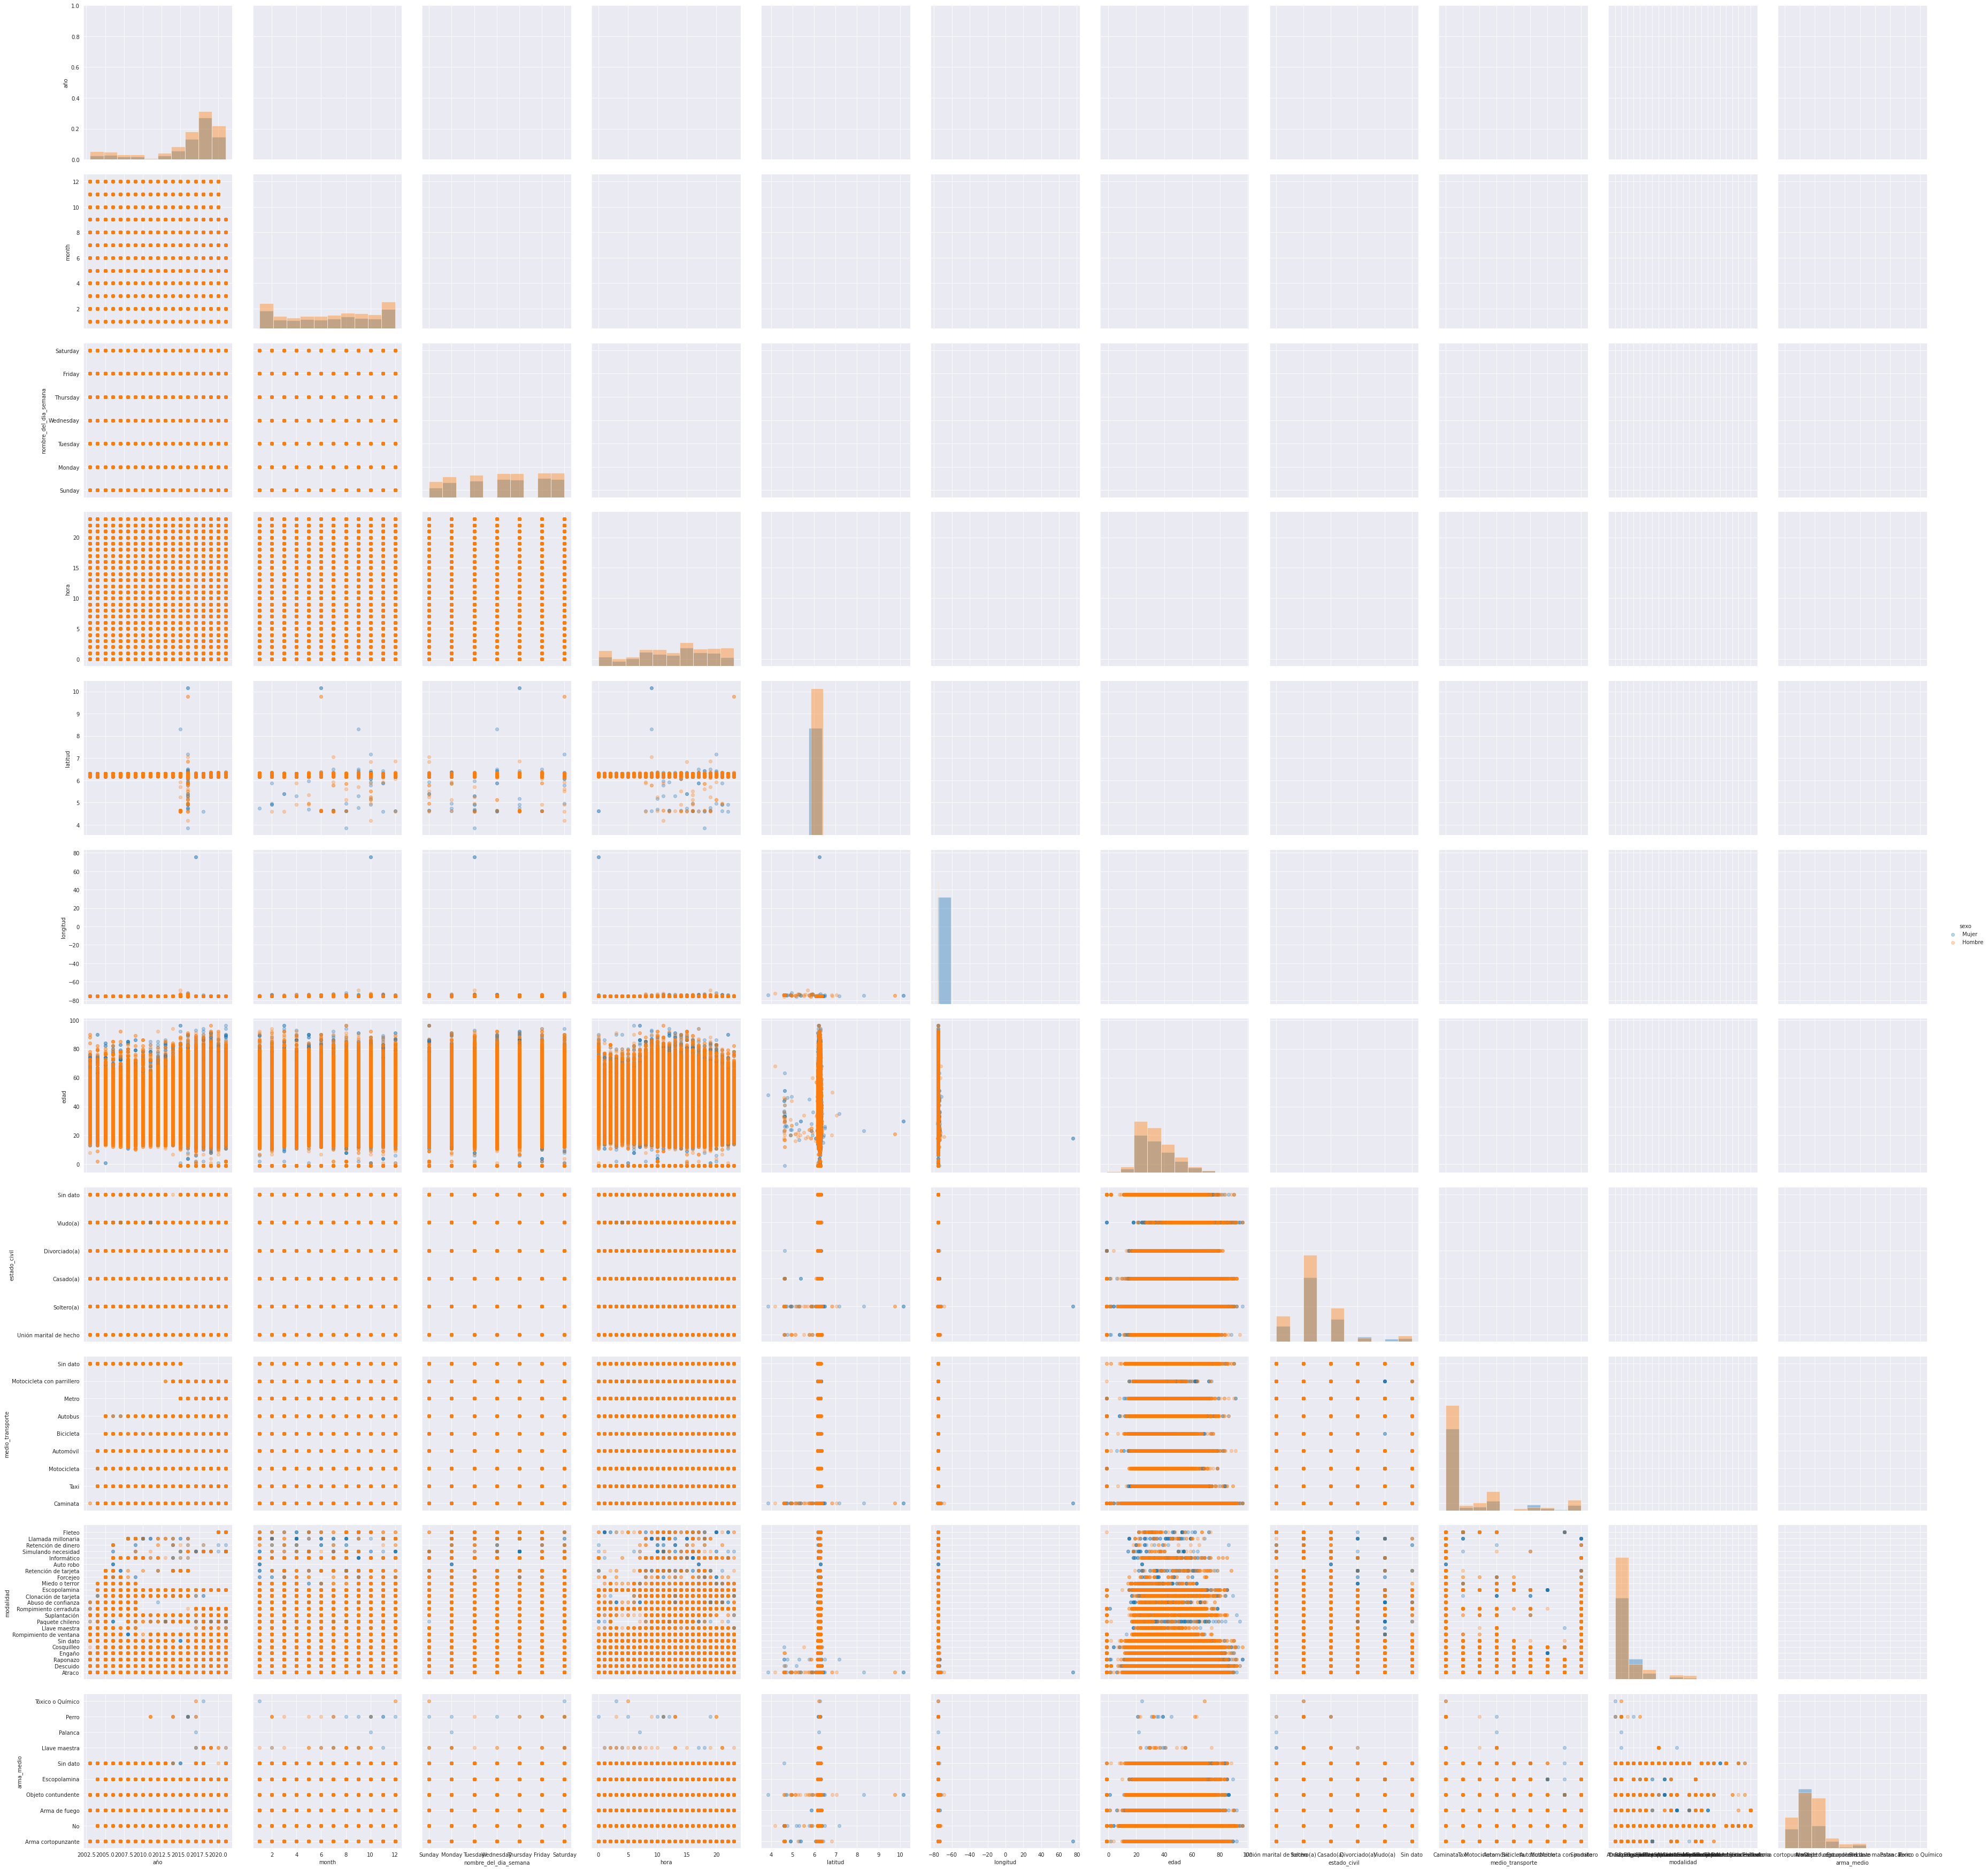

In [ ]:
g = sns.PairGrid(hurtos_df, vars = ['año','month','nombre_del_dia_semana','hora', 'latitud', 'longitud', 'edad', 'estado_civil','medio_transporte','modalidad','arma_medio'], hue = 'sexo', hue_order=['Mujer','Hombre'])
g.fig.set_size_inches(50,50)
g.map_diag(plt.hist, alpha = 0.4)
g.map_lower(plt.scatter, alpha = 0.3, marker='o', plotnonfinite=False)
#g.map_upper(sns.kdeplot, shade =True)
g.add_legend();

The last grahp shows the bivariabte analisys for de most important columns in our dataset. The facts we can infer from it are:

year:
- Year: The number of thefts has increased in the last 10 years, there is an evident trend where men are the most affected by thefts.
- month: There is no identifable relation between the variables in the scatter plot.
- nombre_de_la_semana: There is no identifable relation between the variables in the scatter plot.
- hora: There is no identifable relation between the variables in the scatter plot.
- latitud: It are detected some atypical latitude values that do not correspond to Medellin’s geographical area.
- longitud: It are detected some atypical longitude values that do not correspond to Medellin’s geographical area.
- edad: It is observed an increasing of thefts affecting the upper 80 and below 20-year-old people in the last 10 years, it is interesting the discontinuity of report at around 7 years old people.
- estado_civil:  There is no identifable relation between the variables in the scatter plot.
- medio_de_transporte: Since 2015 exist reports of robbery at metro, it is like bicycle thefts.
- modalidad: It is observed an increasing trend of theft modalities related to fraud since  
- arma_medio: Around year 2015 starts reports of robbery using toxic substances or dogs.

month:
- month: There is anevident increase of thefts in December and January.
- nombre_de_la_semana: There is no identifable relation between the variables in the scatter plot.
- hora: There is no identifable relation between the variables in the scatter plot.
- latitud: It are detected some atypical latitude values that do not correspond to Medellin’s geographical area.
- longitud: It are detected some atypical longitude values that do not correspond to Medellin’s geographical area.
- edad: There is no identifable relation between the variables in the scatter plot, it is interesting the discontinuity of report at around 7 years old people.
- estado_civil: There is no identifable relation between the variables in the scatter plot.
- medio_de_transporte: There is no identifable relation between the variables in the scatter plot.
- modalidad: There is no identifable relation between the variables in the scatter plot.
- arma_medio: There is no identifable relation between the variables in the scatter plot.

nombre_dia_de_la_semana:
- nombre_de_la_semana: It is shown a decreasing of thefts int Sundays, due to people prefer to stay home on sundays.
- hora: There is no identifable relation between the variables in the scatter plot.
- latitud: It are detected some atypical latitude values that do not correspond to Medellin’s geographical area.
- longitud: It are detected some atypical longitude values that do not correspond to 
- edad: There is more affectation >80 years old people on sundays. It is interesting the discontinuity of report at around 7 years old people.
- estado_civil: There is no identifable relation between the variables in the scatter plot.
- medio_de_transporte: There is no identifable relation between the variables in the scatter plot.
- modalidad: There aare a "llamada millonaria" modality decreasing at sundays.
- arma_medio: Only at saturdays and sundays there are reports of thefts using chemical weapons.

hora:
- hora: The peak of reports takes place usualy at working hours, while at nigths there are less theft cases.
- latitud: It are detected some atypical latitude values that do not correspond to Medellin’s geographical area.
- longitud: It are detected some atypical longitude values that do not correspond to Medellin geographical area.
- edad: There is a valley of child and eldery thefts at nigth time.
- estado_civil: There is no identifable relation between the variables in the scatter plot.
- medio_de_transporte: There is no identifable relation between the variables in the scatter plot.
- modalidad: It is seems that for some modalities there is a valley of reports at nigth time (p.e. llamada millonaria, retención de diner, simulando necesidad, etc).
- arma_medio: It is interesting to note that the toxic weapons were used between midnignt and sunrise.

latitud:
- latitud: It are detected some atypical latitude values that do not correspond to Medellin geographical area.
- longitud: It are detected some atypical longitude values that do not correspond to Medellin geographical area.
- edad: It seems that an error occurred at data gathering, since there is latitude data out from Medellin for several ages. 
- estado_civil: It seems that an error occurred at data gathering, since there is latitude data out from Medellin for several marital status. 
- medio_de_transporte: There is no identifable relation between the variables.
- modalidad: It seems that an error occurred at data gathering, since there is latitude data out from Medellin for caminata modality. 
- arma_medio: It seems that an error occurred at data gathering, since there is latitude data out from Medellin for several weapon types. 

longitud:
- longitud: There is no identifable relation between the variables.
- edad: There is no identifiable relation between the variables.
- estado_civil: There is no identifable relation between the variables.
- medio_de_transporte: There is no identifable relation between the variables.
- modalidad: There is no identifable relation between the variables.
- arma_medio: There is no identifable relation between the variables.

edad:
- edad: Tere is a concentration of thefts affecting people between 20 and 40 years old, being the young the most affected.
- estado_civil: Widow people are more affected at higer ages than other marital states.
- medio_de_transporte: The caminata mean of transport is the most common for all ages.
- modalidad: The Cosquilleo, raponazo, descuido and atraco modalities are the most common amog all ages, while the fraud related crimes concentrate at young - adult people. 
- arma_medio: The reports of dog, toxic and lever weapong concentrates on young - adult people. 

estado_civil:
- estado_civil: Single people are the most affected by robbery crimes, while widow women are the less affected. 
- medio_de_transporte: There is no identifable relation between the variables in the scatter plot.
- modalidad: There is no identifable relation between the variables in the scatter plot.
- arma_medio: There is no identifable relation between the variables in the scatter plot.

medio_de_transporte:
- medio_de_transporte: There is no identifable relation between the variables in the scatter plot.
- modalidad: Divorced and widow people has less reports of thefts related to fraud. 
- arma_medio: There is no identifable relation between the variables in the scatter plot.

modalidad:
- modalidad: The Cosquilleo, raponazo, descuido and atraco modalities are the most common.
- arma_medio: The Cosquilleo, raponazo, descuido and atraco modalities are very correlated with the use of toxic, dog, and lever weapons.

arma_medio:

- arma_medio: The firearm, knives and unnarmed thefs are the most common.



# Let's check on a heatmap the most common locations for thefts during the year 2021.


In [ ]:
hurtos_df2 = hurtos_df[hurtos_df.fecha_hecho>='2021-01-01']

In [ ]:
# We only leave coordinates with data
non_nan_hurtos = hurtos_df2[~(hurtos_df2.latitud == 'Sin dato')]
non_nan_hurtos = non_nan_hurtos[~(non_nan_hurtos.longitud == 'Sin dato')]

In [ ]:
non_nan_hurtos[['latitud','longitud']] = non_nan_hurtos[['latitud','longitud']].astype(float)


In [ ]:
# for_map = Map(location=[6.29970294, -75.58201578], zoom_start=12, )

In [ ]:
# hm_wide = HeatMap(
#     list(zip(non_nan_hurtos.latitud.values, non_nan_hurtos.longitud.values)),
#     min_opacity=0.2,
#     radius=40, 
#     blur=40,
# ).add_to(for_map)


In [ ]:
# for_map

In [ ]:
latitud = non_nan_hurtos['latitud']
longitud = non_nan_hurtos['longitud']

In [ ]:
# merge the two dataframes
non_nan_hurtos_año = non_nan_hurtos.merge(consolidado_df, on='año')
# sample 1000
non_nan_hurtos_año = non_nan_hurtos_año.sample(1000)

In [ ]:
# non_nan_hurtos_año = non_nan_hurtos_año[non_nan_hurtos_año.Fecha_hecho>='2021-01-01']

**Density MapBox:**

In [ ]:
fig = px.density_mapbox(non_nan_hurtos_año, lat="latitud", lon="longitud", z="Cantidad_casos", radius=20, zoom=10, center={"lat": 6.29970294, "lon": -75.58201578}, mapbox_style="open-street-map")
fig.update_layout(mapbox_style="open-street-map")
# dcc.Graph(figure=fig)
fig.show()

**Observation:** In this map we can observe several hot zones, where the central zone stands out, but let's do a deeper investigation, take into account data from 2021 where it reaches until September and take into account that we took a sample of 1000.

**Scatter MapBox:**

In [ ]:
# scatter mapbox
fig1 = px.scatter_mapbox(non_nan_hurtos_año, lat="latitud", lon="longitud", color="nombre_barrio", size="Cantidad_casos",
                            size_max=25, zoom=10, center={"lat": 6.29970294, "lon": -75.58201578},
                            opacity=0.5)
fig1.update_layout(mapbox_style="open-street-map")
fig1.update_layout(
    title_text='Number of cases in 2021 for each neighborhood.')
# fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# dcc.Graph(figure=fig1)
fig1.show()
fig.write_html("map_map.html")

In [ ]:
# histograma fig1
fig2 = px.histogram(non_nan_hurtos_año, x="Cantidad_casos", y='nombre_barrio', color='modalidad',
                            histfunc='count', nbins=10, marginal='box',
                            opacity=0.5)
fig2.update_layout(
    title_text='Number of cases year 2021 with a sample of 1000.',
    xaxis_title_text='quantity',
    yaxis_title_text='neighborhood',
)
# dcc.Graph(figure=fig2)
fig2.show()
fig.write_html("hist_map.html")

In [ ]:
fig1 = px.scatter_mapbox(non_nan_hurtos_año, lat="latitud", lon="longitud", color="modalidad", size="Cantidad_casos",
                            size_max=25, zoom=10, center={"lat": 6.29970294, "lon": -75.58201578},
                            opacity=0.5)
fig1.update_layout(mapbox_style="open-street-map")
fig1.update_layout(
    title_text='Number of cases in 2021 by modality, sample 1000.')
# fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# dcc.Graph(figure=fig1)
fig1.show()
fig.write_html("hur_map.html")

**Observation:** We have a sample of the size of 1000 samples, we can see that the Candelaria area is the one with the most criminal activity and it is easy to understand it is the downtown area in the city of Medellin, followed by the town, which is a great discovery since It is the stratum 6 zone of the city of Medellin, standing out the mode of robbery.

In [ ]:
# save map in html


#Analysis of thefts in Poblado Comuna 
Due to Poblado is the second comuna with the highest rates in thefts. We will analyse the relation of thefts with day of week and hour.  

In [21]:
## We take day of week from the date column
hurtos_df['dia_semana'] = hurtos_df['fecha_hecho'].dt.weekday
hurtos_df.head(1)

fecha_hecho   latitud   longitud   sexo  edad            estado_civil  \
0  2017-01-01  6.299703 -75.582016  Mujer    33  Unión marital de hecho   

  medio_transporte         conducta modalidad conducta_especial  ...  \
0         Caminata  Hurto a persona    Atraco        De celular  ...   

  categoria_bien grupo_bien     color  hora_hecho edad_categoria   año  \
0     Tecnología  Mercancía  Sin dato        1:00         adulto  2017   

  nombre_del_dia_semana hora month dia_semana  
0                Sunday    1     1          6  

[1 rows x 27 columns]

In [22]:
#We will encode the means of transport variable
transporter_cod = preprocessing.LabelEncoder()
hurtos_df['transporte_code'] = transporter_cod.fit_transform(hurtos_df['medio_transporte'])

In [23]:
# We will transform sex variable into a dummies variable
hurtos_df = pd.get_dummies(hurtos_df, columns=['sexo'])
hurtos_df.rename(columns={'sexo_Hombre': 'sex_male', 'sexo_Mujer': 'sex_female'}, inplace=True)
hurtos_df.head(10)

fecha_hecho   latitud   longitud  edad            estado_civil  \
0  2017-01-01  6.299703 -75.582016    33  Unión marital de hecho   
1  2017-01-01  6.250917 -75.566160    26              Soltero(a)   
2  2017-01-01  6.274836 -75.554909    30              Soltero(a)   
3  2017-01-01  6.276236 -75.553533    37               Casado(a)   
4  2017-01-01  6.250339 -75.586914    87               Casado(a)   
5  2017-01-01  6.219071 -75.602996    29  Unión marital de hecho   
6  2017-01-01  6.317709 -75.678259    27              Soltero(a)   
7  2017-01-01  6.268307 -75.558457    36              Soltero(a)   
8  2017-01-01  6.242797 -75.554797    41               Casado(a)   
9  2017-01-01  6.246823 -75.562114    59              Soltero(a)   

  medio_transporte         conducta modalidad conducta_especial  \
0         Caminata  Hurto a persona    Atraco        De celular   
1         Caminata  Hurto a persona    Atraco          Sin dato   
2         Caminata  Hurto a persona  Descuido        De celular   
3             Taxi  Hurto a persona    Atraco        De celular   
4         Caminata  Hurto a persona    Engaño          Sin dato   
5             Taxi  Hurto a persona  Descuido                No   
6      Motocicleta  Hurto a persona    Atraco          Sin dato   
7         Caminata  Hurto a persona  Descuido          Sin dato   
8         Caminata  Hurto a persona    Atraco        De celular   
9         Caminata  Hurto a persona  Descuido                No   

           arma_medio  ... hora_hecho edad_categoria   año  \
0  Arma cortopunzante  ...       1:00         adulto  2017   
1  Arma cortopunzante  ...      15:00         adulto  2017   
2                  No  ...      14:00         adulto  2017   
3       Arma de fuego  ...      16:00         adulto  2017   
4                  No  ...      16:00   adulto mayor  2017   
5                  No  ...      16:00         adulto  2017   
6       Arma de fuego  ...      20:30         adulto  2017   
7                  No  ...      16:00         adulto  2017   
8  Arma cortopunzante  ...       0:30         adulto  2017   
9                  No  ...       8:00         adulto  2017   

  nombre_del_dia_semana hora month dia_semana transporte_code sex_male  \
0                Sunday    1     1          6               3        0   
1                Sunday   15     1          6               3        0   
2                Sunday   14     1          6               3        1   
3                Sunday   16     1          6               8        1   
4                Sunday   16     1          6               3        1   
5                Sunday   16     1          6               8        0   
6                Sunday   20     1          6               5        1   
7                Sunday   16     1          6               3        1   
8                Sunday    0     1          6               3        1   
9                Sunday    8     1          6               3        1   

  sex_female  
0          1  
1          1  
2          0  
3          0  
4          0  
5          1  
6          0  
7          0  
8          0  
9          0  

[10 rows x 29 columns]

In [24]:
hurtos_df['codigo_comuna']= hurtos_df['codigo_comuna'].astype('str')

In [25]:
hurtos_df['codigo_comuna'].unique()

array(['6', '10', '4', '11', '16', '50', '9', '7', '3', '13', '14', '15',
       '8', '5', '2', '12', '90', '80', '60', '70', '1', '99'],
      dtype=object)

In [26]:
# The comunas 90, 80, 60 and 70 don't belong to Medellin, for that reason we will drop them
model_hurtos_df = hurtos_df[hurtos_df['codigo_comuna'] != ('90' or  '80' or '60' or '70')]#.value_counts()

In [27]:

#The code number of Poblado comuna es 14
poblado_hurtos = model_hurtos_df[hurtos_df['codigo_comuna']=='14']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
#We will get the hour of the theft 
poblado_hurtos.hora_hecho = pd.to_datetime(poblado_hurtos.hora_hecho, format='%H:%M').dt.hour

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [29]:
new_df = pd.DataFrame(poblado_hurtos.groupby(['dia_semana','hora_hecho']).agg({'sex_male':'sum','sex_female':'sum'})).reset_index()#.size()).reset_index()
new_df['ocurrence'] = new_df['sex_male']+ new_df['sex_female']

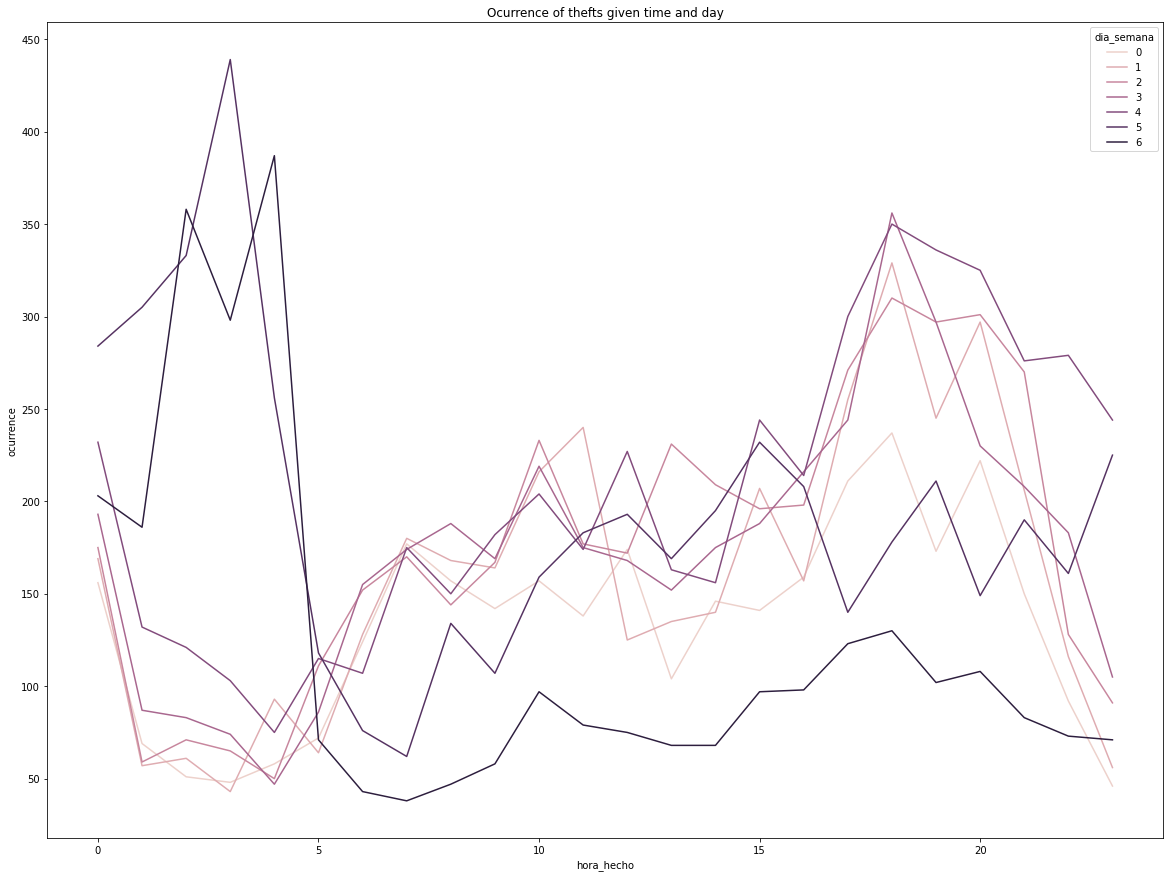

In [30]:
plt.figure(figsize=(20,15))
plt.title('Ocurrence of thefts given time and day')
sns.lineplot(data=new_df,x='hora_hecho',y='ocurrence',hue='dia_semana')

The above graph represents the amount of thefts in Poblado by hour and day. 
From this graph, we can observe that during weekend's night the thefts in poblado are the most common. This has a lot of sense, because this zone of Medellin city is famous because of its parties. 
 

# Logistic regression for Poblado comuna


We want to predict the risk of theft in poblado given all the events in the city. 

In [31]:
#We will use the one hot encoding for all the comunas:
hurtos_comunas_dummies = pd.get_dummies(hurtos_df, columns=['codigo_comuna'])
hurtos_comunas_dummies.columns

Index(['fecha_hecho', 'latitud', 'longitud', 'edad', 'estado_civil',
       'medio_transporte', 'conducta', 'modalidad', 'conducta_especial',
       'arma_medio', 'nombre_barrio', 'codigo_barrio', 'lugar',
       'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien', 'color',
       'hora_hecho', 'edad_categoria', 'año', 'nombre_del_dia_semana', 'hora',
       'month', 'dia_semana', 'transporte_code', 'sex_male', 'sex_female',
       'codigo_comuna_1', 'codigo_comuna_10', 'codigo_comuna_11',
       'codigo_comuna_12', 'codigo_comuna_13', 'codigo_comuna_14',
       'codigo_comuna_15', 'codigo_comuna_16', 'codigo_comuna_2',
       'codigo_comuna_3', 'codigo_comuna_4', 'codigo_comuna_5',
       'codigo_comuna_50', 'codigo_comuna_6', 'codigo_comuna_60',
       'codigo_comuna_7', 'codigo_comuna_70', 'codigo_comuna_8',
       'codigo_comuna_80', 'codigo_comuna_9', 'codigo_comuna_90',
       'codigo_comuna_99'],
      dtype='object')

As a first step in our model we will use the following variables in our logitistic regression

In [32]:
variables_poblado = ['edad','hora','dia_semana', 'codigo_comuna_14','sex_male', 'sex_female']

In [33]:
comuna_poblado = hurtos_comunas_dummies[variables_poblado]
comuna_poblado

edad  hora  dia_semana  codigo_comuna_14  sex_male  sex_female
0         33     1           6                 0         0           1
1         26    15           6                 0         0           1
2         30    14           6                 0         1           0
3         37    16           6                 0         1           0
4         87    16           6                 0         1           0
...      ...   ...         ...               ...       ...         ...
248527    69    11           3                 0         0           1
248528    52     5           3                 0         1           0
248529    42    17           3                 0         1           0
248530    30    16           3                 1         1           0
248531    -1    16           3                 0         1           0

[245216 rows x 6 columns]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [35]:
train, test = train_test_split(comuna_poblado,train_size=0.8)

In [36]:
X_train = train[['edad','hora','dia_semana','sex_male', 'sex_female']]
Y_train = train['codigo_comuna_14']

In [37]:
X_test = test[['edad','hora','dia_semana','sex_male', 'sex_female']]
Y_test = test['codigo_comuna_14']

In [38]:
 Scaler = MinMaxScaler()
Scaler.fit(X_train)


MinMaxScaler()

In [39]:
X_train = Scaler.transform(X_train)

In [40]:
X_test = Scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [43]:
clf.score(X_train, Y_train)

0.8847541952980038

In [44]:
clf.score(X_test, Y_test)

0.884511866895033

From the above results aparently we get a really good score. For this reason, let's check our model precision.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn import linear_model

In [46]:
def evalBinaryClassifier(model, x, y, labels=['Positives','Negatives']):
    '''
    Visualize the performance of  a Logistic Regression Binary Classifier.
    
    Displays a labelled Confusion Matrix, distributions of the predicted
    probabilities for both classes, the ROC curve, and F1 score of a fitted
    Binary Logistic Classifier. Author: gregcondit.com/articles/logr-charts
    
    Parameters
    ----------
    model : fitted scikit-learn model with predict_proba & predict methods
        and classes_ attribute. Typically LogisticRegression or 
        LogisticRegressionCV
    
    x : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples
        in the data to be tested, and n_features is the number of features
    
    y : array-like, shape (n_samples,)
        Target vector relative to x.
    
    labels: list, optional
        list of text labels for the two classes, with the positive label first
        
    Displays
    ----------
    3 Subplots
    
    Returns
    ----------
    F1: float
    '''
    #model predicts probabilities of positive class
    p = model.predict_proba(x)
    if len(model.classes_)!=2:
        raise ValueError('A binary class problem is required')
    if model.classes_[1] == 1:
        pos_p = p[:,1]
    elif model.classes_[0] == 1:
        pos_p = p[:,0]
    
    #FIGURE
    plt.figure(figsize=[15,4])
    
    #1 -- Confusion matrix
    cm = confusion_matrix(y,model.predict(x))
    plt.subplot(131)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 14}, fmt='g')
    cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
    for i,t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix', size=15)
    plt.xlabel('Predicted Values', size=13)
    plt.ylabel('True Values', size=13)
      
    #2 -- Distributions of Predicted Probabilities of both classes
    df = pd.DataFrame({'probPos':pos_p, 'target': y})
    plt.subplot(132)
    plt.hist(df[df.target==1].probPos, density=True, bins=25,
             alpha=.5, color='green',  label=labels[0])
    plt.hist(df[df.target==0].probPos, density=True, bins=25,
             alpha=.5, color='red', label=labels[1])
    plt.axvline(.5, color='blue', linestyle='--', label='Boundary')
    plt.xlim([0,1])
    plt.title('Distributions of Predictions', size=15)
    plt.xlabel('Positive Probability (predicted)', size=13)
    plt.ylabel('Samples (normalized scale)', size=13)
    plt.legend(loc="upper right")
    
    #3 -- ROC curve with annotated decision point
    fp_rates, tp_rates, _ = roc_curve(y,p[:,1])
    roc_auc = auc(fp_rates, tp_rates)
    plt.subplot(133)
    plt.plot(fp_rates, tp_rates, color='green',
             lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color='grey')
    #plot current decision point:
    tn, fp, fn, tp = [i for i in cm.ravel()]
    plt.plot(fp/(fp+tn), tp/(tp+fn), 'bo', markersize=8, label='Decision Point')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)
    plt.title('ROC Curve', size=15)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace=.3)
    plt.show()
    #Print and Return the F1 score
    tn, fp, fn, tp = [i for i in cm.ravel()]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2*(precision * recall) / (precision + recall)
    printout = (
        f'Precision: {round(precision,2)} | '
        f'Recall: {round(recall,2)} | '
        f'F1 Score: {round(F1,2)} | '
    )
    print(printout)
    return F1

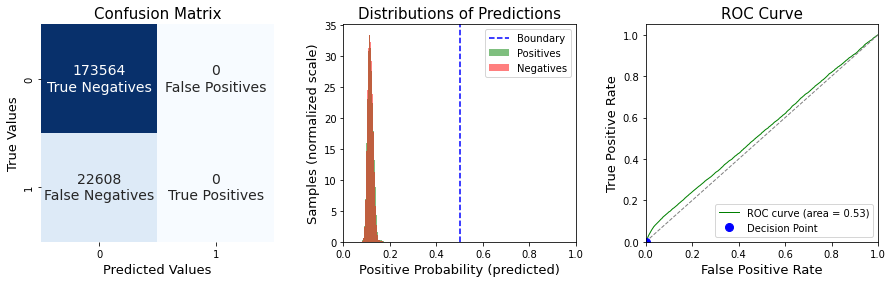

Precision: nan | Recall: 0.0 | F1 Score: nan | 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in long_scalars


nan

In [47]:
evalBinaryClassifier(clf,X_train, Y_train)

From the above results, we can conclude that our model isn't making the right predition. Actually, our model fail to detect thefts in Poblado. 
The high difference between the number of positives and negatives values could lead to an overfitting in the detection of negatives values. 
For our following approach, we will homogenize our training set. 

## Model correction 
We will homogenize the dataset, hence, we will use half values from the chosen comuna and the other half random values obtained from the rest of the comunas.

In [48]:
comuna_poblado

edad  hora  dia_semana  codigo_comuna_14  sex_male  sex_female
0         33     1           6                 0         0           1
1         26    15           6                 0         0           1
2         30    14           6                 0         1           0
3         37    16           6                 0         1           0
4         87    16           6                 0         1           0
...      ...   ...         ...               ...       ...         ...
248527    69    11           3                 0         0           1
248528    52     5           3                 0         1           0
248529    42    17           3                 0         1           0
248530    30    16           3                 1         1           0
248531    -1    16           3                 0         1           0

[245216 rows x 6 columns]

In [49]:
import random

In [50]:
def comuna_set(Number,comuna_poblado):
  Poblado_all = comuna_poblado[comuna_poblado['codigo_comuna_'+ Number]==1]
  Non_poblado = comuna_poblado[comuna_poblado['codigo_comuna_'+Number]==0]
  sample_data = random.sample(range(Non_poblado.shape[0]), Poblado_all.shape[0])
  Non_poblado_sample = Non_poblado.iloc[sample_data]
  sub_sample_poblado = pd.concat([Poblado_all,Non_poblado_sample])
  train, test = train_test_split(sub_sample_poblado,train_size=0.8)
  return train, test

In [51]:
train, test = comuna_set('14',comuna_poblado)

In [52]:
X_train = train[['edad','hora','dia_semana','sex_male', 'sex_female']]
Y_train = train['codigo_comuna_14']

X_test = test[['edad','hora','dia_semana','sex_male', 'sex_female']]
Y_test = test['codigo_comuna_14']

In [53]:
X_train['edad'] =  (train['edad']-train['edad'].mean())/train['edad'].std()
X_test['edad'] =  (test['edad']-test['edad'].mean())/test['edad'].std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
clf = LogisticRegression(random_state=100).fit(X_train, Y_train)

In [55]:
clf.score(X_train, Y_train)

0.5167237758372941

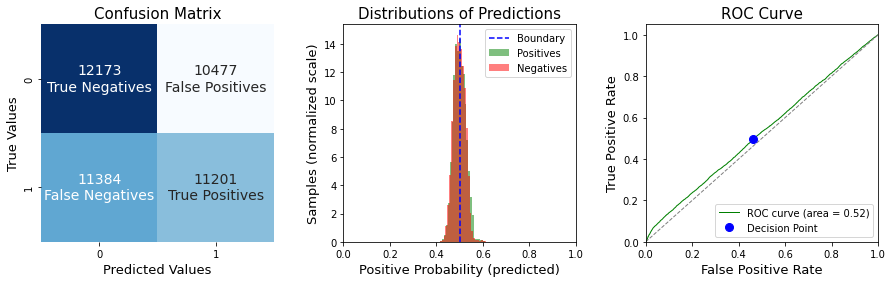

Precision: 0.52 | Recall: 0.5 | F1 Score: 0.51 | 


0.5061111989697942

In [56]:
evalBinaryClassifier(clf,X_train, Y_train)

However, the performance of our logistic regression didn't improve much. For this reason, we will use other classification model.

# K-Nearest Neighbor algorithm 



The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.



In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
neigh = KNeighborsClassifier(n_neighbors=3)


In [59]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
neigh.score(X_train, Y_train)

0.7296120260859954

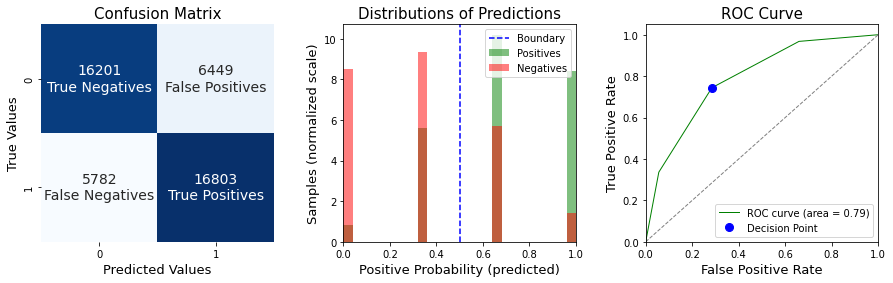

Precision: 0.72 | Recall: 0.74 | F1 Score: 0.73 | 


0.7331631651286078

In [61]:
evalBinaryClassifier(neigh,X_train, Y_train)

##Chosing the number of neighbors 
In this case, we will check the score using our training and test data. Then, we'll use the model with an optimal gap between test and train data.


In [67]:
score_test = []
score_train = []
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i_test = knn.score(X_test, Y_test)
    pred_i_train = knn.score(X_train, Y_train)
    score_test.append(pred_i_test)
    score_train.append(pred_i_train)

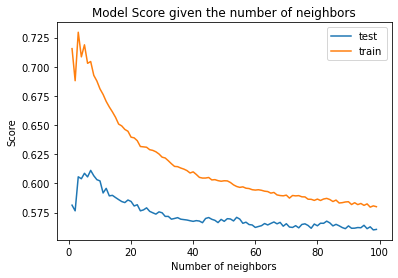

In [68]:
k = np.arange(1,100)
plt.title('Model Score given the number of neighbors')
plt.plot(k,score_test,label='test')
plt.plot(k,score_train,label='train')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.show()

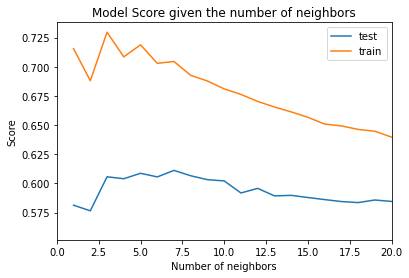

In [69]:
k = np.arange(1,100)
plt.title('Model Score given the number of neighbors')
plt.plot(k,score_test,label='test')
plt.plot(k,score_train,label='train')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.xlim(0,20)
plt.show()

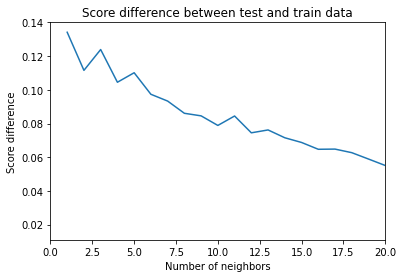

In [72]:
plt.title('Score difference between test and train data')
plt.plot(k,np.array(score_train)-np.array(score_test))
plt.xlabel('Number of neighbors')
plt.ylabel('Score difference')
plt.xlim(0,20)
plt.show()

We chose k value of 3, because it hase the best scores for train and test data.

#Decision Tree algorithm 


In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)
dtree.fit(X_train,Y_train)
y_pred=dtree.predict(X_test)
dtree.score(X_test,Y_test)

0.612786276417013

In [75]:
dtree.score(X_train,Y_train)

0.7746214214656792

### Selecting the optimus depth value

In [76]:
score_test = []
score_train = []
for i in range(1,100):
    
    knn = DecisionTreeClassifier(max_depth=i, random_state=300)
    knn.fit(X_train,Y_train)
    pred_i_test = knn.score(X_test, Y_test)
    pred_i_train = knn.score(X_train, Y_train)
    score_test.append(pred_i_test)
    score_train.append(pred_i_train)

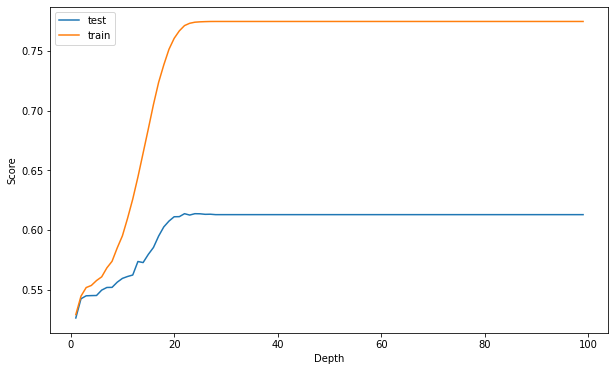

In [78]:
k = np.arange(1,100)
plt.figure(figsize=(10,6))
plt.plot(k,score_test,label='test')
plt.plot(k,score_train,label='train')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()

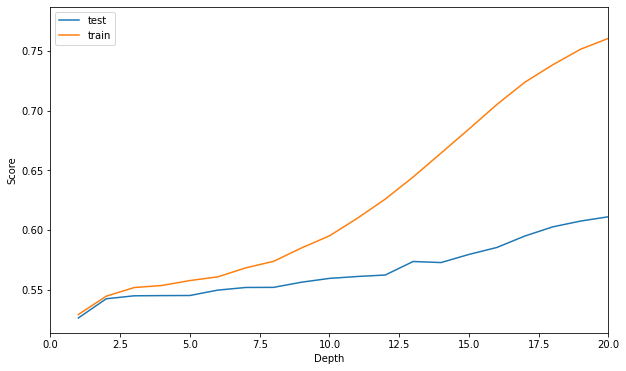

In [79]:
k = np.arange(1,100)
plt.figure(figsize=(10,6))
plt.plot(k,score_test,label='test')
plt.plot(k,score_train,label='train')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Score')
plt.xlim(0,20)
plt.show()

From the above graphs, we can see tha the optimus depth has a worse train and test score than one obtained by the algorithm of KNN.


From the above results, we chose the algorithm of KNN with k=3.  We are now prepare to extrapolate to the rest of the communas.

In [62]:
hurtos_comunas_dummies

fecha_hecho   latitud   longitud  edad            estado_civil  \
0       2017-01-01  6.299703 -75.582016    33  Unión marital de hecho   
1       2017-01-01  6.250917 -75.566160    26              Soltero(a)   
2       2017-01-01  6.274836 -75.554909    30              Soltero(a)   
3       2017-01-01  6.276236 -75.553533    37               Casado(a)   
4       2017-01-01  6.250339 -75.586914    87               Casado(a)   
...            ...       ...        ...   ...                     ...   
248527  2021-09-30  6.239203 -75.596686    69               Casado(a)   
248528  2021-09-30  6.275737 -75.581470    52           Divorciado(a)   
248529  2021-09-30  6.253145 -75.566181    42              Soltero(a)   
248530  2021-09-30  6.210456 -75.569637    30  Unión marital de hecho   
248531  2021-09-30  6.278422 -75.571080    -1              Soltero(a)   

       medio_transporte         conducta              modalidad  \
0              Caminata  Hurto a persona                 Atraco   
1              Caminata  Hurto a persona                 Atraco   
2              Caminata  Hurto a persona               Descuido   
3                  Taxi  Hurto a persona                 Atraco   
4              Caminata  Hurto a persona                 Engaño   
...                 ...              ...                    ...   
248527         Caminata  Hurto a persona        Paquete chileno   
248528         Caminata  Hurto a persona  Rompimiento cerraduta   
248529         Caminata  Hurto a persona             Cosquilleo   
248530         Caminata  Hurto a persona               Descuido   
248531         Caminata  Hurto a persona                 Atraco   

       conducta_especial          arma_medio  ... codigo_comuna_50  \
0             De celular  Arma cortopunzante  ...                0   
1               Sin dato  Arma cortopunzante  ...                0   
2             De celular                  No  ...                0   
3             De celular       Arma de fuego  ...                0   
4               Sin dato                  No  ...                0   
...                  ...                 ...  ...              ...   
248527          Sin dato                  No  ...                0   
248528          Sin dato                  No  ...                0   
248529          Sin dato                  No  ...                0   
248530          Sin dato                  No  ...                0   
248531          Sin dato            Sin dato  ...                0   

       codigo_comuna_6 codigo_comuna_60 codigo_comuna_7 codigo_comuna_70  \
0                    1                0               0                0   
1                    0                0               0                0   
2                    0                0               0                0   
3                    0                0               0                0   
4                    0                0               0                0   
...                ...              ...             ...              ...   
248527               0                0               0                0   
248528               0                0               1                0   
248529               0                0               0                0   
248530               0                0               0                0   
248531               0                0               0                0   

       codigo_comuna_8 codigo_comuna_80 codigo_comuna_9 codigo_comuna_90  \
0                    0                0               0                0   
1                    0                0               0                0   
2                    0                0               0                0   
3                    0                0               0                0   
4                    0                0               0                0   
...                ...              ...             ...              ...   
248527               0                0

In [63]:
import joblib

In [64]:
comunas = model_hurtos_df.codigo_comuna.unique()

In [65]:
comunas

array(['6', '10', '4', '11', '16', '50', '9', '7', '3', '13', '14', '15',
       '8', '5', '2', '12', '80', '60', '70', '1', '99'], dtype=object)

In [66]:
comuna_poblado

edad  hora  dia_semana  codigo_comuna_14  sex_male  sex_female
0         33     1           6                 0         0           1
1         26    15           6                 0         0           1
2         30    14           6                 0         1           0
3         37    16           6                 0         1           0
4         87    16           6                 0         1           0
...      ...   ...         ...               ...       ...         ...
248527    69    11           3                 0         0           1
248528    52     5           3                 0         1           0
248529    42    17           3                 0         1           0
248530    30    16           3                 1         1           0
248531    -1    16           3                 0         1           0

[245216 rows x 6 columns]

In [ ]:
# hurtos_comunas_dummies[variables_comuna]


In [ ]:
dic['hola'] = [20,29]

20

In [ ]:
dic = {}
for i in comunas:
  variables_comuna = ['edad','hora','dia_semana', 'codigo_comuna_'+i,'sex_male', 'sex_female']
  comuna_data = hurtos_comunas_dummies[variables_comuna]
  train, test = comuna_set(i,comuna_data)
  X_train = train[['edad','hora','dia_semana','sex_male', 'sex_female']]
  Y_train = train['codigo_comuna_'+i]

  X_test = test[['edad','hora','dia_semana','sex_male', 'sex_female']]
  Y_test = test['codigo_comuna_'+i]
  mean = train['edad'].mean()
  std = train['edad'].std()
  
  dic[i] = [mean,std]
  X_train['edad'] =  (train['edad']-mean)/std
  X_test['edad'] =  (test['edad']-mean)/std

  neigh = KNeighborsClassifier(n_neighbors=15)
  neigh.fit(X_train, Y_train)
  print('comuna ',i,' score: ', neigh.score(X_train, Y_train))
  joblib.dump(neigh, 'drive/Shareddrives/DS4A Team 81/EDA/Modelos_k15/model_comuna_'+i+'.pkl') 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  6  score:  0.6314403911244829


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  10  score:  0.651765083440308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  4  score:  0.6428357613250848


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  11  score:  0.653862855789349


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  16  score:  0.6529492905937992
comuna  50  score:  0.6271186440677966


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

comuna  9  score:  0.6437768240343348


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  7  score:  0.6417020300493176


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  3  score:  0.6415348367553012


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  13  score:  0.6387585709130278


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  14  score:  0.6566817729634132


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  15  score:  0.6504616041410961


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  8  score:  0.6403764581124072


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


comuna  5  score:  0.6413678065054211
comuna  2  score:  0.6518630033872789


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

comuna  12  score:  0.6464549246069939
comuna  80  score:  0.6349658314350797


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

comuna  60  score:  0.6402005850396991
comuna  70  score:  0.6204268292682927


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

comuna  1  score:  0.6401372212692967
comuna  99  score:  0.6656746031746031


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
dic

{'1': [34.00926243567753, 12.917891137197145],
 '10': [34.54079749679076, 13.11810691583745],
 '11': [34.06999328885555, 12.881788041769308],
 '12': [34.593968559512355, 13.067911762360385],
 '13': [34.15806568025983, 13.120459592885815],
 '14': [34.08904609262739, 12.809263359020491],
 '15': [34.279257164203, 12.69185280887944],
 '16': [34.62214266946926, 12.925280964669268],
 '2': [34.68009032743696, 12.785594020211544],
 '3': [34.34365533490407, 12.898176030979261],
 '4': [33.595440031929755, 12.635440802668846],
 '5': [34.17074413863405, 12.763222818662728],
 '50': [39.559322033898304, 11.95576788580866],
 '6': [34.262128619781876, 12.846986480620906],
 '60': [34.73171750940242, 12.862206483304579],
 '7': [34.05401995641702, 12.870250623202132],
 '70': [34.823170731707314, 11.942833796524878],
 '8': [34.43584305408272, 12.804151707408467],
 '80': [33.90432801822323, 12.253168137495422],
 '9': [34.475224346468984, 12.71877789677891],
 '99': [36.54761904761905, 14.621939219540435]}

In [ ]:
import pickle

In [ ]:
a_file = open("drive/Shareddrives/DS4A Team 81/EDA/age_normalizer.pkl", "wb")
pickle.dump(dic, a_file)
a_file.close()

In [ ]:
knn_from_joblib = joblib.load('drive/Shareddrives/DS4A Team 81/EDA/Modelos/model_comuna_'+i+'.pkl')

In [ ]:
knn_from_joblib.predict(X_train)

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [ ]:
knn_from_joblib.predict_proba(X_train)

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       ...,
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667]])

In [ ]:
Y_train

42170    1
94474    0
51960    1
42851    1
43450    1
        ..
43166    1
42933    1
42634    1
47857    1
21806    1
Name: codigo_comuna_99, Length: 1008, dtype: uint8

In [ ]:
# knn_from_joblib.predict()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

# Mockup frontend design.

We present a draft of our dashboard, our mission is to make a predictive model that will allow us to know which people are more likely to be robbed in which neighborhoods and at what times.

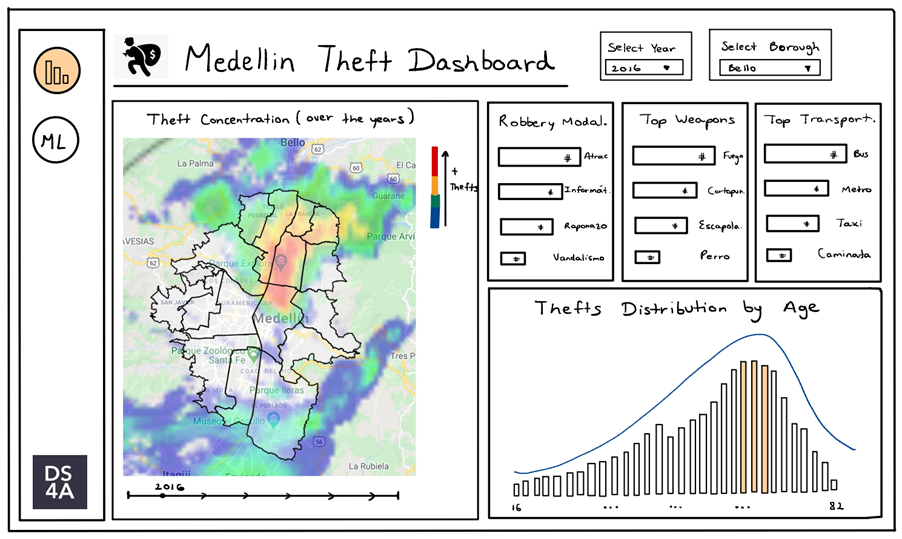

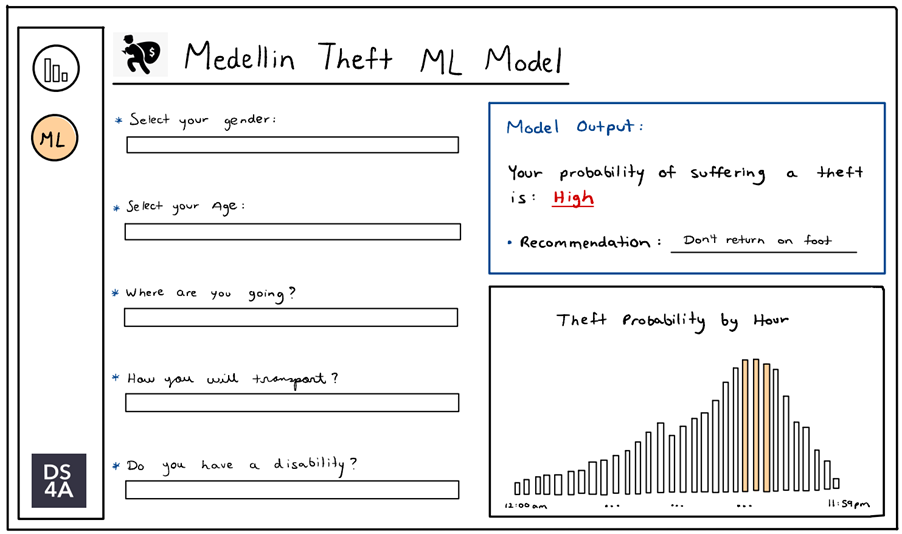

**We will be correcting and new analyses will come out in the course of the project, these were our first questions and observations.**

Thank you very much! 

**Team 81.**

In [ ]:
# !jupyter nbconvert --to html /content/hur_map.html

In [ ]:
# hurtos_df.to_csv('drive/Shareddrives/DS4A Team 81/EDA/dataset/hurtos_df.csv', index=False)

In [ ]:
# consolidado_df.to_csv('drive/Shareddrives/DS4A Team 81/EDA/dataset/consolidado_df.csv', index=False)